In [9]:
# !pip install ipynb
# from ast import literal_eval
from ipynb.fs.full.useful_functions_for_QAOAAnsatz import *
# import math

In [10]:
### QUESTA C'è ANCHE NEL FILE DELLE FUNZIONI, MA HO AGGIUNTO objective_func_vals

def cost_func(params, ansatz, hamiltonian, estimator):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance

    Returns:
        float: Energy estimate
    """
    pub = (ansatz, [hamiltonian], [params])
    result = estimator.run(pubs=[pub]).result()
    cost = result[0].data.evs[0]
    cost_vs_iteration.append(cost)
    
    return cost

### Random parameters minimization


##### Da k (trovato dall'altro file) ricavo h = k+epsilon

In [11]:
def round_up(n, decimals=0):
    multiplier = 10**decimals
    return math.ceil(n * multiplier) / multiplier   

def add_epsilon(k_vector):
    h_vector = [t+0.001 if round_up(t,3)==t else round_up(t,3) for t in k_vector]
    return h_vector

def truncate(num, n):
    """
    if num has more than n digits -> returns only n digits
    if num is an int              -> returns num
    if num has less than n digits -> returns num
    """
    str_num = str(num)
    if not "." in str_num: return num
    decimals = str_num.split(".")[1]
    if len(decimals) == n or len(decimals) < n:
        return num
    else:
        a = int(decimals[n])
        new_num = num - a / (10)**(n+1)
        truncated_num = round(new_num, n)
        return truncated_num

In [13]:
def find_all_h(n):
    
    if n==6:
        ### PER DIM 6
        k_n_list = [0.3333333333333333, 0.5, 0.5, 0.3333333333333333, 0.5, 0.5, 0.5, 0.3333333333333333, 0.25, 0.25]
        k_L_MEC_list = [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.1111111111111111, 0.16666666666666666, 0.16666666666666666, 0.25, 0.16666666666666666, 0.08333333333333333, 0.08333333333333333]
        k_best_list = [0.16666666666666666, 0.16666666666666666, 0.25, 0.16666666666666666, 0.3333333333333333, 0.25, 0.25, 0.16666666666666666, 0.08333333333333333, 0.08333333333333333]
        k_L_ECs = [[], [], [0.25], [0.16666666666666666], [0.3333333333333333], [0.25, 0.25], [], [], [], []]
    
    elif n==8:
        
        ### PER DIM 8
        k_n_list [0.25, 0.3333333333333333, 0.2, 0.25, 0.16666666666666666, 0.25, 0.25, 0.3333333333333333, 0.3333333333333333, 0.25]
        k_L_MEC_list = [0.0625, 0.08333333333333333, 0.05, 0.0625, 0.041666666666666664, 0.09375, 0.0625, 0.08333333333333333, 0.08333333333333333, 0.09375]
        k_L_ECs =  [[], [0.125], [0.075], [0.125], [], [], [], [0.125], [0.16666666666666666], []]
        k_true_list [0.020833333333333332, 0.020833333333333332, 0.020833333333333332, 0.025, 0.03125, 0.041666666666666664, 0.03125, 0.017857142857142856, 0.03125, 0.05]
        k_best_list [0.0625, 0.125, 0.075, 0.125, 0.041666666666666664, 0.09375, 0.0625, 0.125, 0.16666666666666666, 0.09375]
    
    h_n = add_epsilon(k_n_list)
    h_best = add_epsilon(k_best_list)
    h_L_ECs = [add_epsilon(lista) for lista in k_L_ECs]
    h_L_MEC = add_epsilon(k_L_MEC_list)
    
    return h_n, h_best, h_L_ECs, h_L_MEC

##### Scegliere i parametri !

In [14]:
n=6

h_n, h_best, h_L_ECs, h_L_MEC = find_all_h(n)

h_L_MEC = [truncate(h,3) for h in h_L_MEC]
print(h_L_MEC)

[0.167, 0.167, 0.167, 0.112, 0.167, 0.167, 0.251, 0.167, 0.084, 0.084]


##### Minimizzazione per ogni istanza a dimensione n

3 0.251
init_name: ['000010', '010000', '010001', '110000', '110001', '011000', '000001', '000010', '000100', '001000', '010000', '100000']
EXACT_COVERS: ['011000', '110001']
MEC: ['011000']


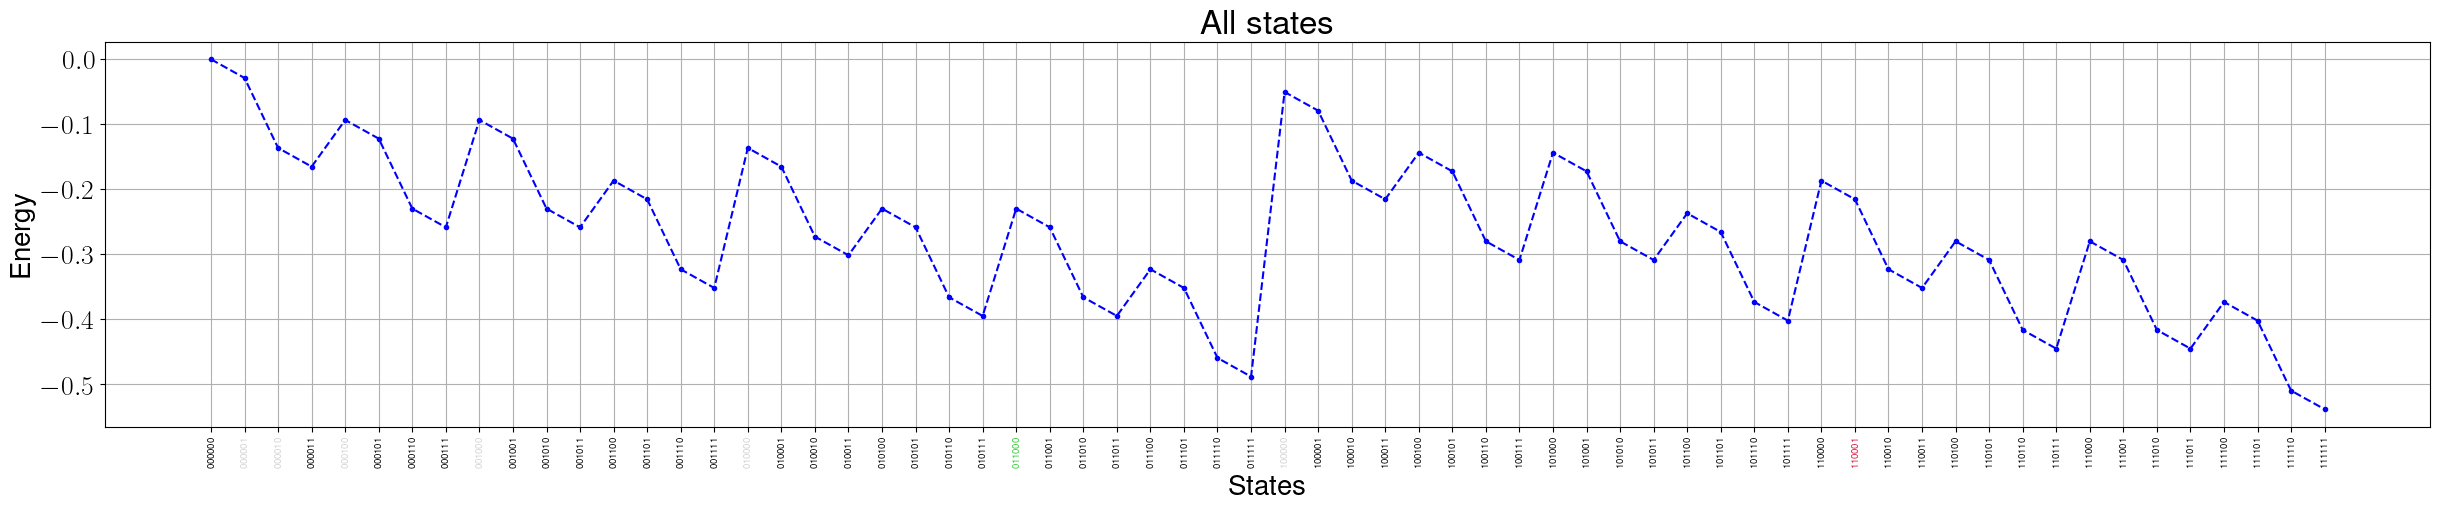

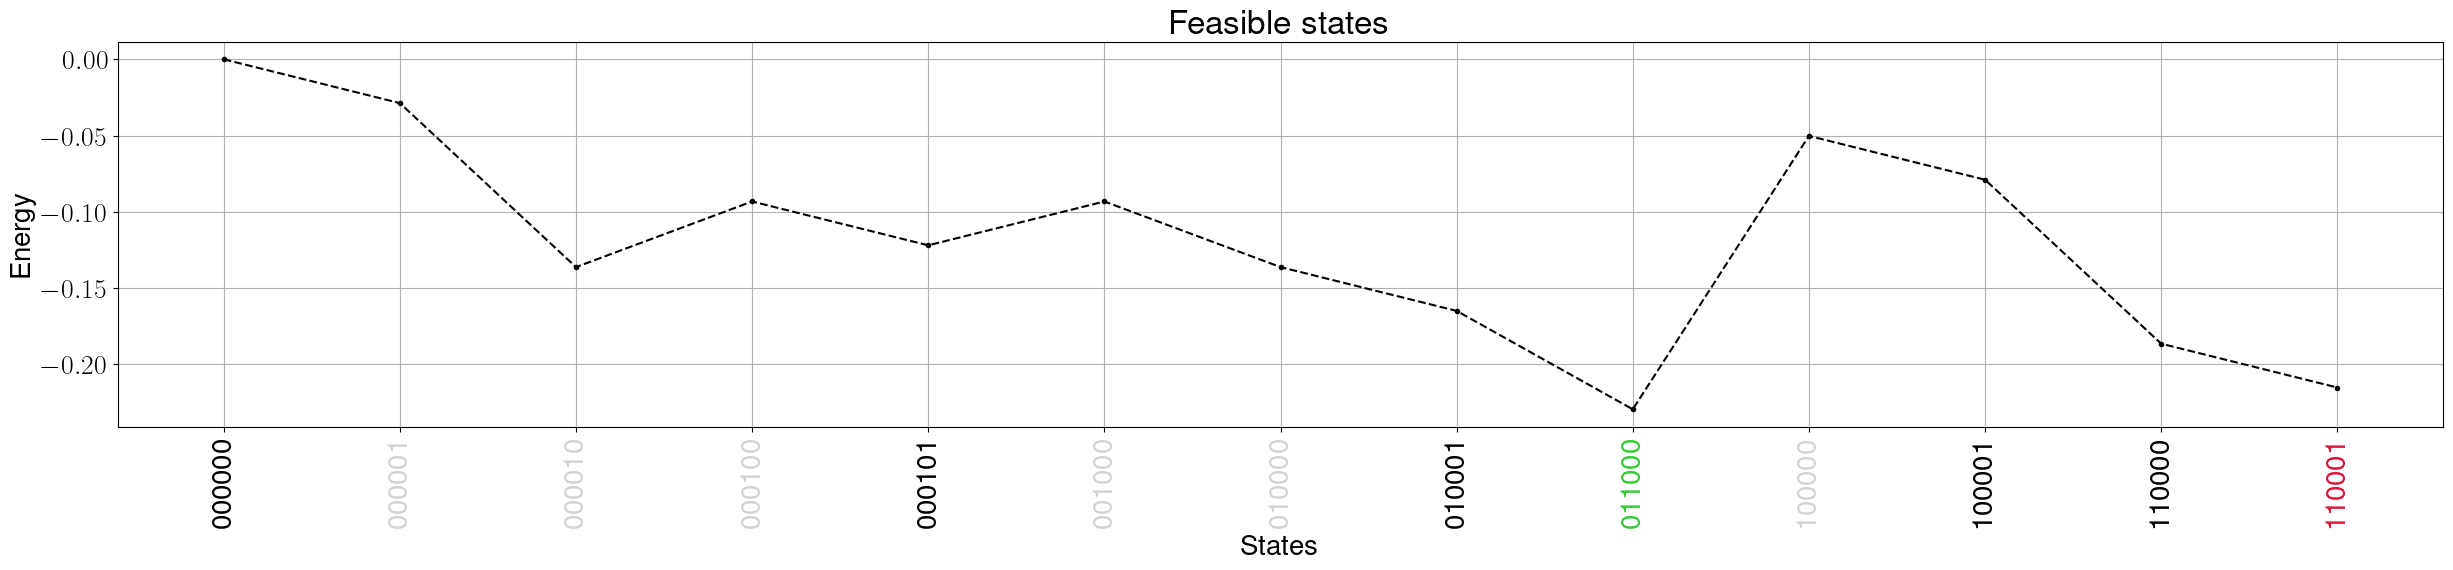

Initialization: ['000010', '010000', '010001', '110000', '110001', '011000', '000001', '000010', '000100', '001000', '010000', '100000']
kEC_11-10@17h12m_dim6_mail3_ultimi6conECall1_random_p3_5ra_k0.251_BOUNDS[0,2pi]x[-110,110]_pars0[0,2pi]x[-110,110]
Optimization terminated successfully.
         Current function value: 0.072770
         Iterations: 369
         Function evaluations: 582


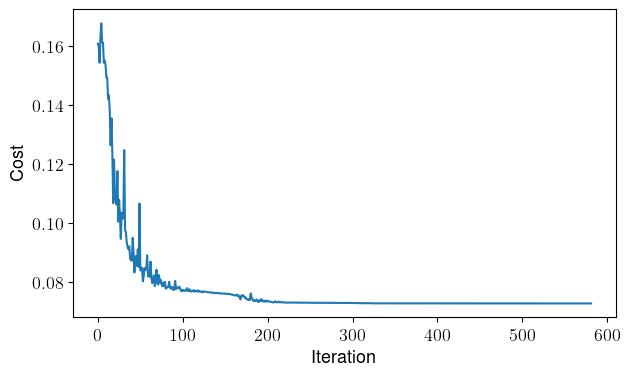

***UPDATING***


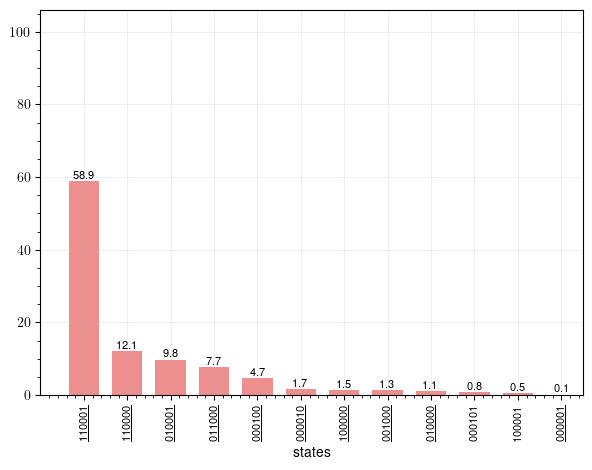

Optimization terminated successfully.
         Current function value: 0.078376
         Iterations: 474
         Function evaluations: 752


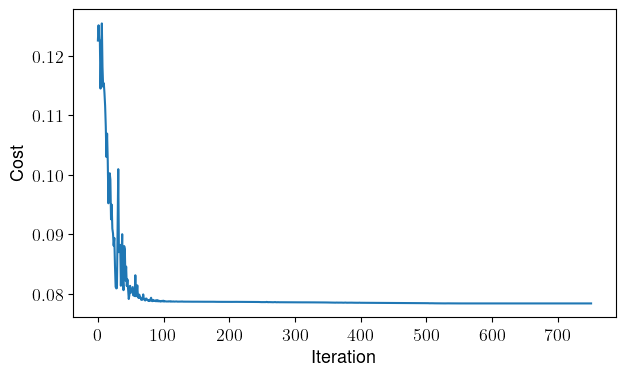

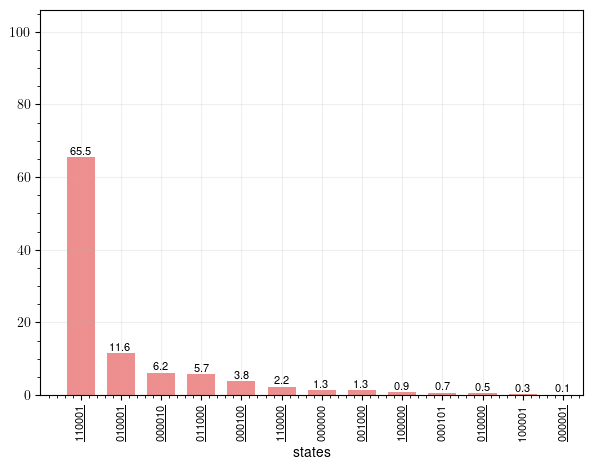

/tmp/ipykernel_303/1063111815.py:146: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  res = minimize(cost_func, pars_0, bounds=bnds,


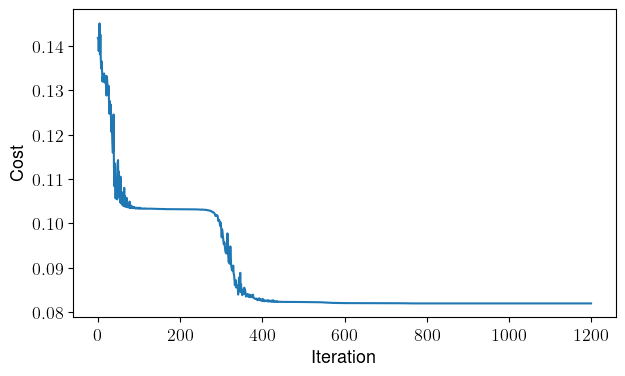

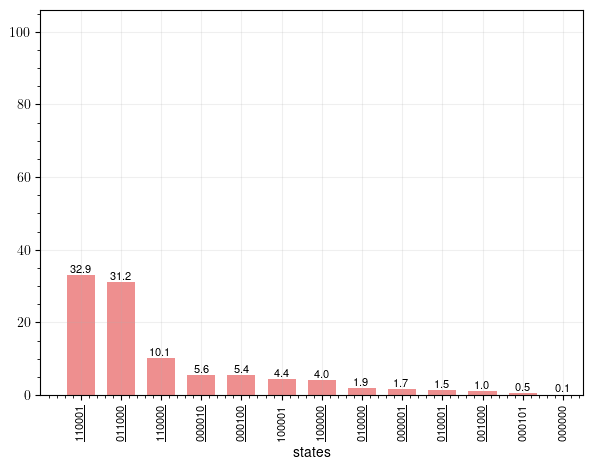

Optimization terminated successfully.
         Current function value: 0.077437
         Iterations: 230
         Function evaluations: 384


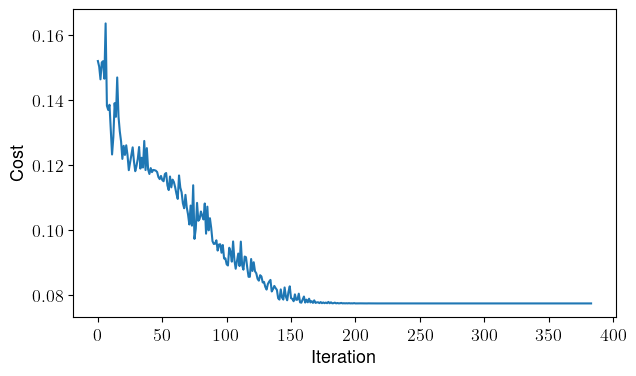

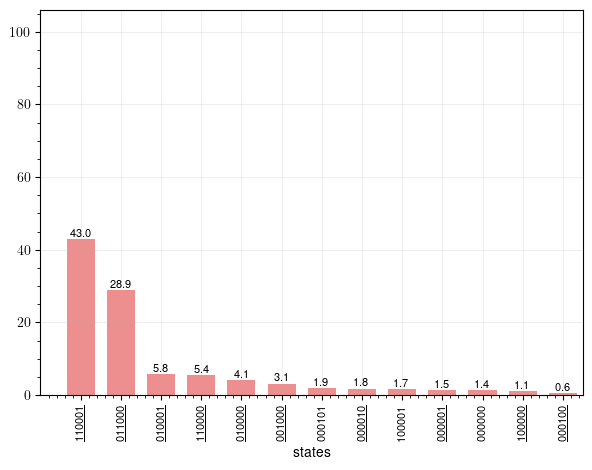

Optimization terminated successfully.
         Current function value: 0.095735
         Iterations: 200
         Function evaluations: 331


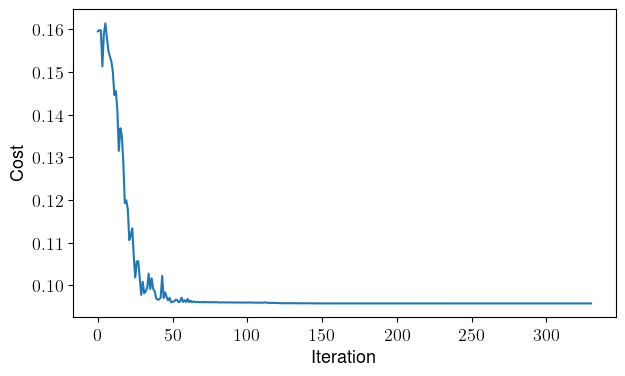

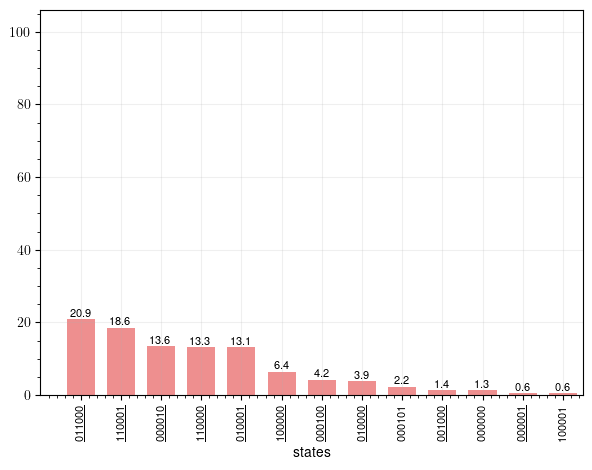

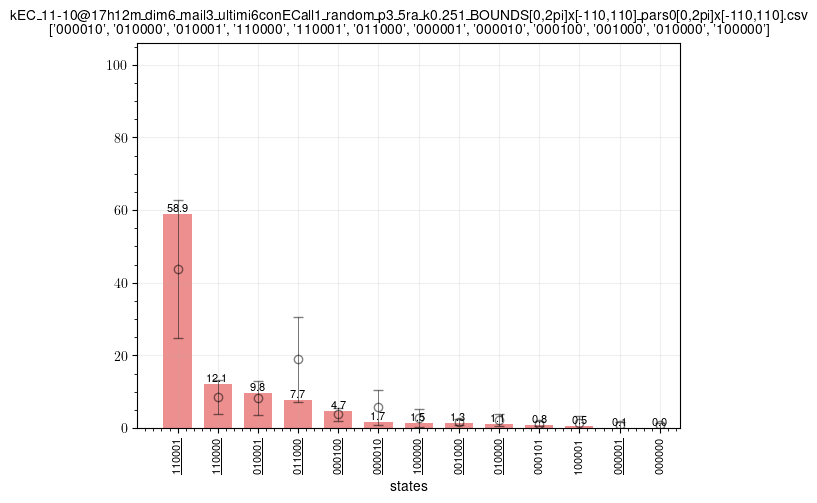


TOTAL ELAPSED TIME: 3.6897640029589334 minutes.
4 0.167
init_name: ['100000', '001010', '010001', '011000', '011001', '100100', '000001', '000010', '000100', '001000', '010000', '100000']
EXACT_COVERS: ['011001', '100100']
MEC: ['100100']


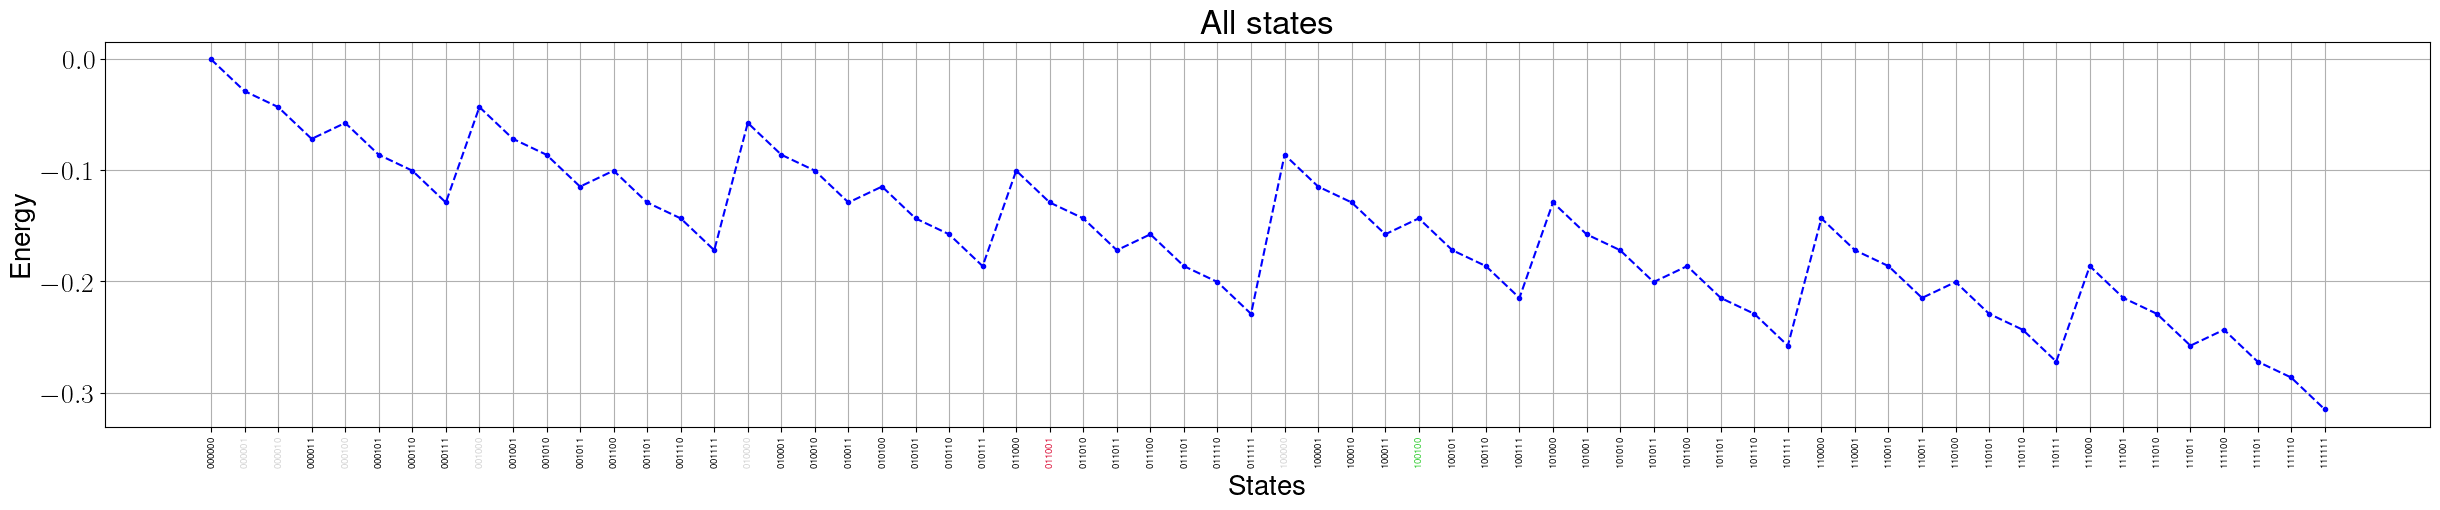

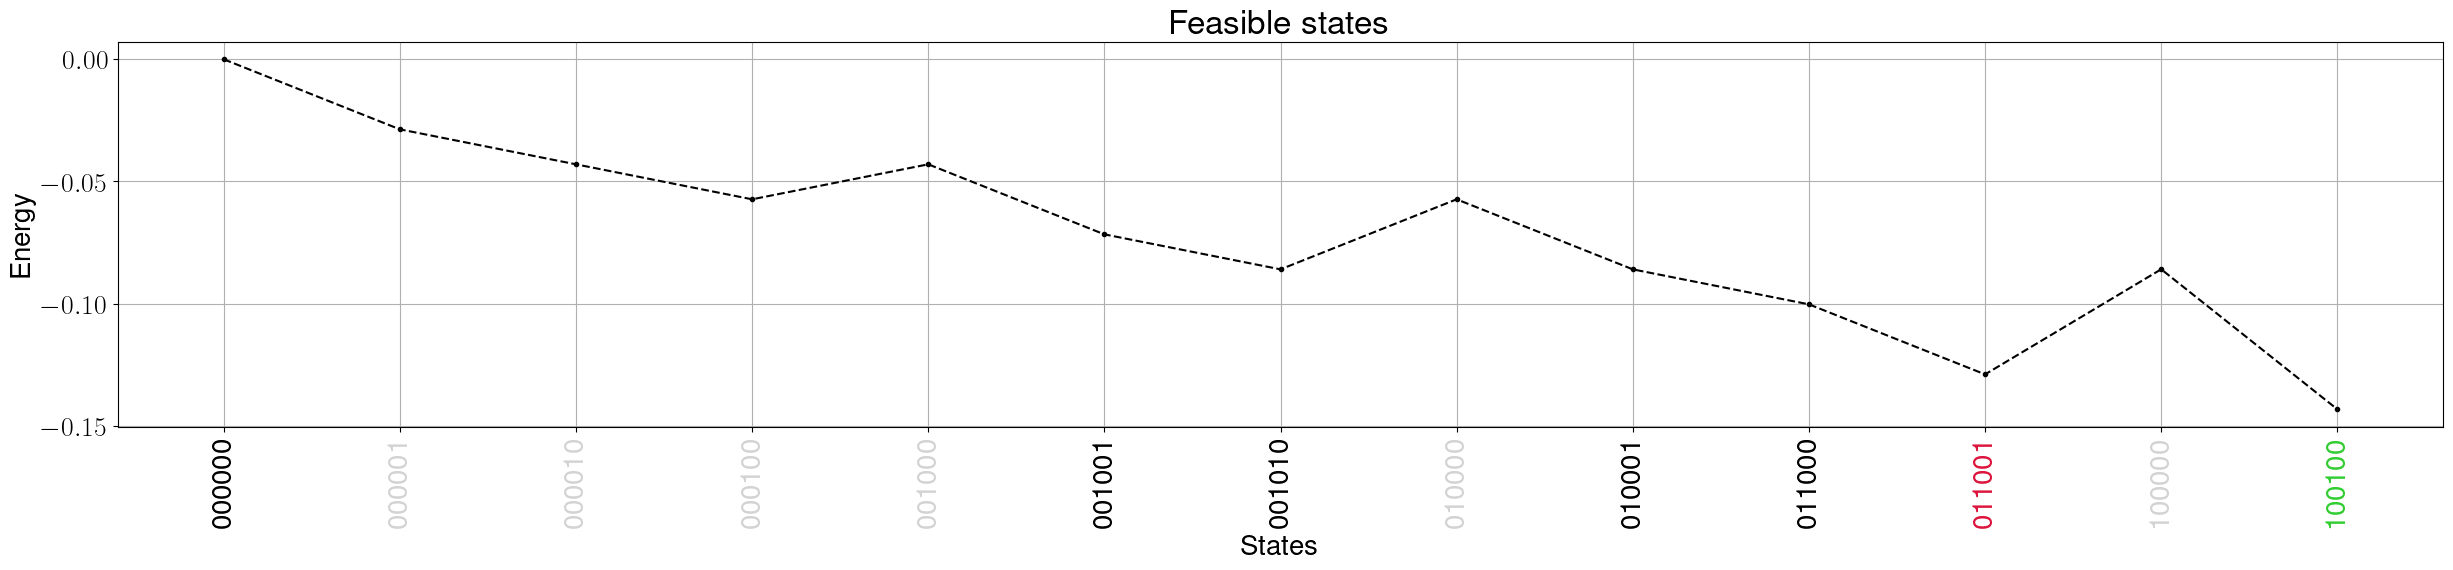

Initialization: ['100000', '001010', '010001', '011000', '011001', '100100', '000001', '000010', '000100', '001000', '010000', '100000']
kEC_11-10@17h16m_dim6_mail4_ultimi6conECall1_random_p3_5ra_k0.167_BOUNDS[0,2pi]x[-110,110]_pars0[0,2pi]x[-110,110]
Optimization terminated successfully.
         Current function value: 0.037605
         Iterations: 750
         Function evaluations: 1136


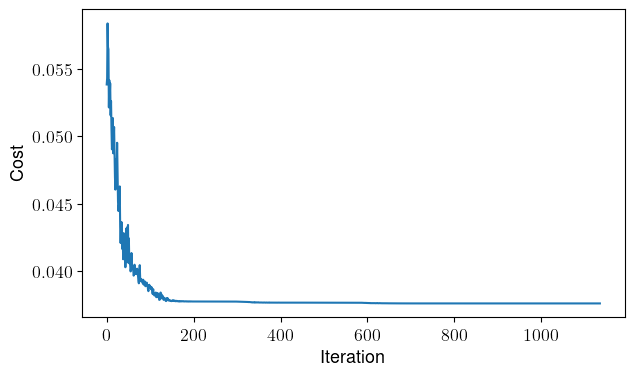

***UPDATING***


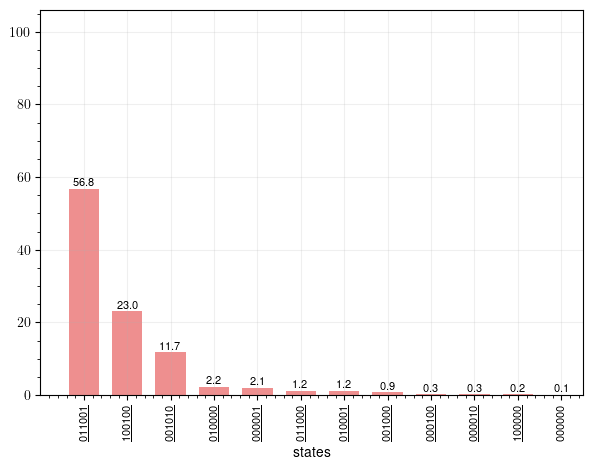

Optimization terminated successfully.
         Current function value: 0.037691
         Iterations: 574
         Function evaluations: 914


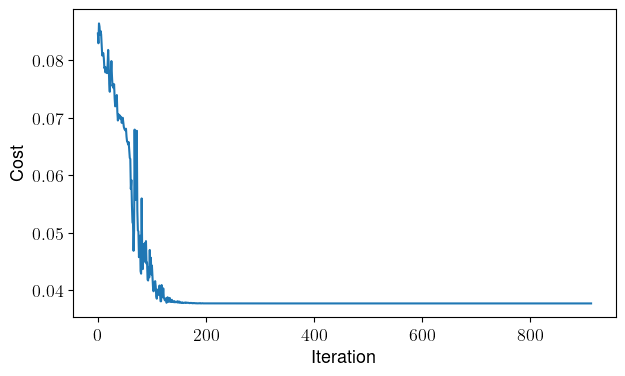

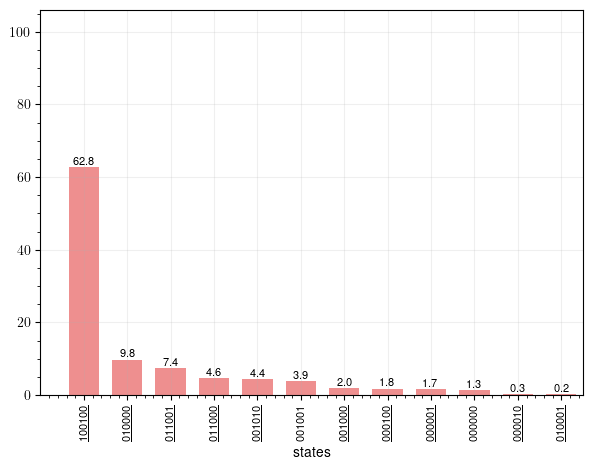

Optimization terminated successfully.
         Current function value: 0.058244
         Iterations: 470
         Function evaluations: 741


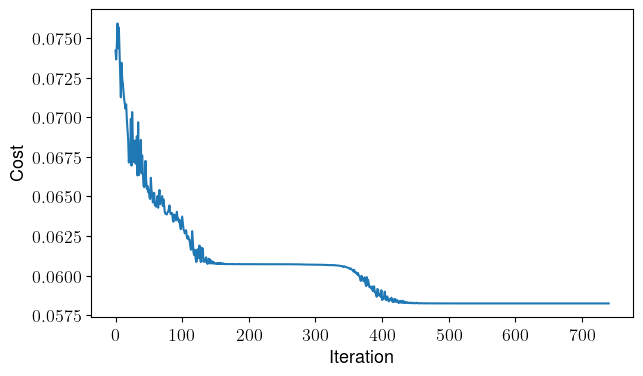

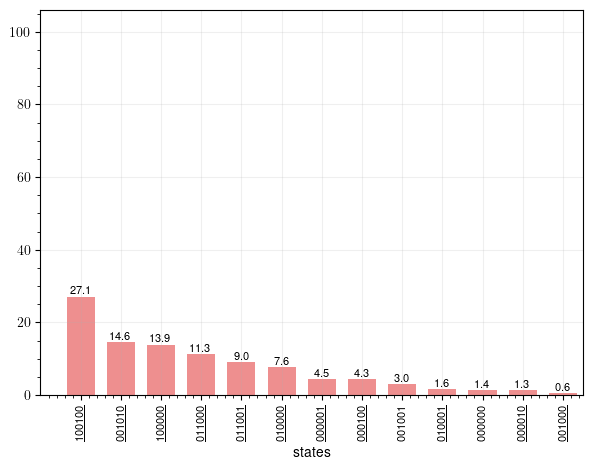

Optimization terminated successfully.
         Current function value: 0.041449
         Iterations: 376
         Function evaluations: 600


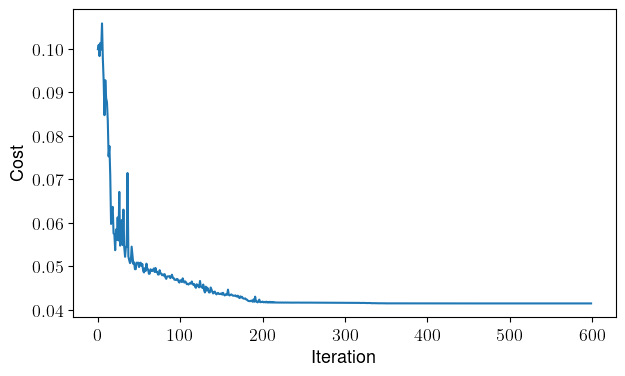

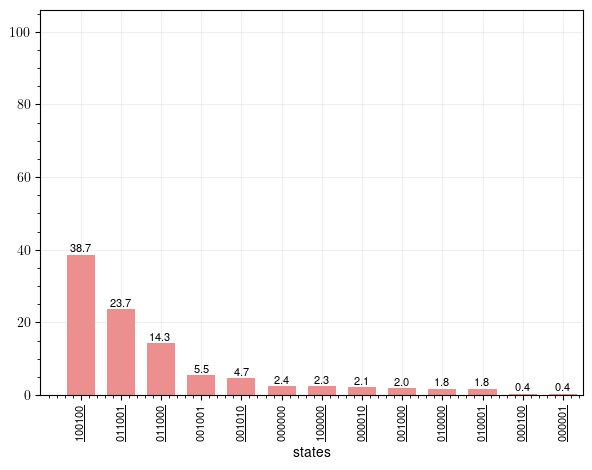

Optimization terminated successfully.
         Current function value: 0.047996
         Iterations: 776
         Function evaluations: 1196


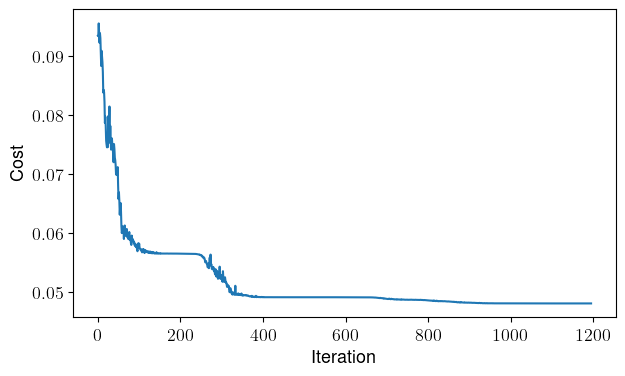

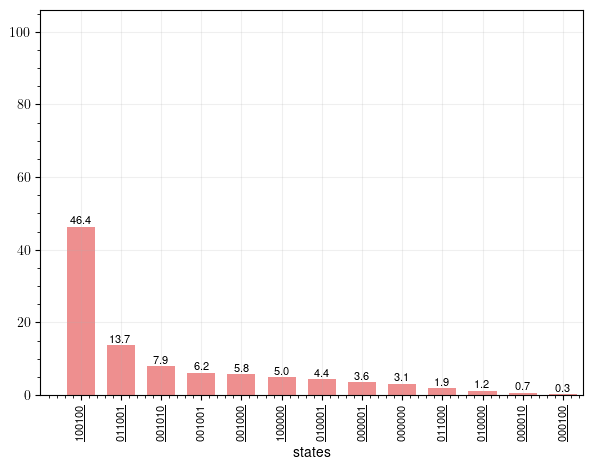

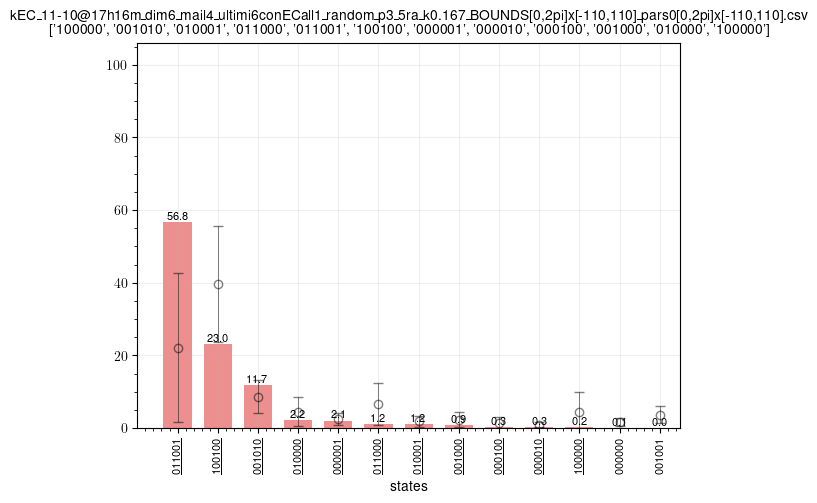


TOTAL ELAPSED TIME: 5.1594003717104595 minutes.
5 0.334
init_name: ['000110', '101100', '001101', '101001', '101101', '010010', '000001', '000010', '000100', '001000', '010000', '100000']
EXACT_COVERS: ['010010', '101101']
MEC: ['010010']


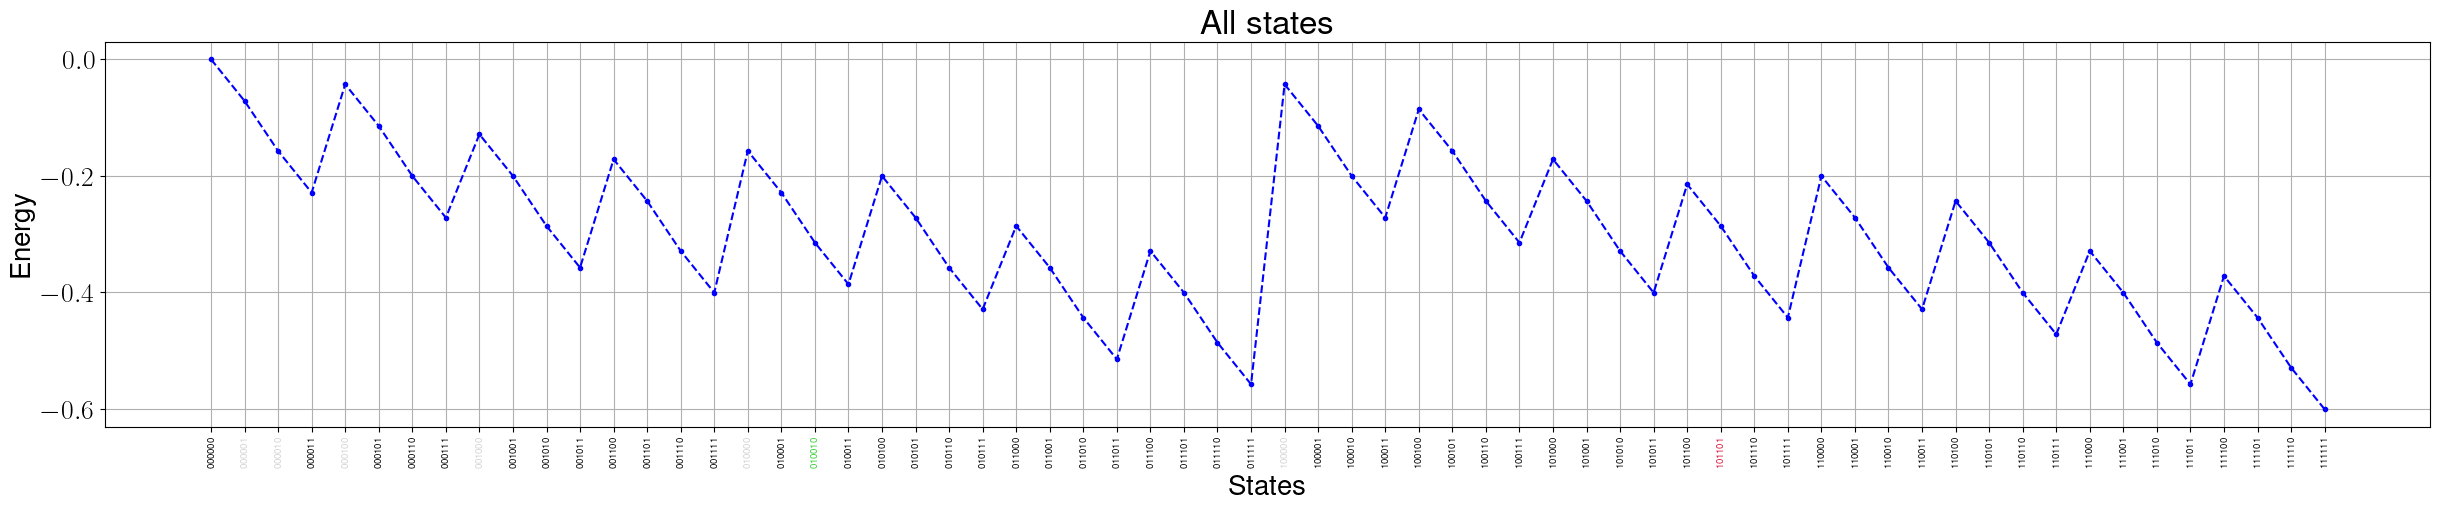

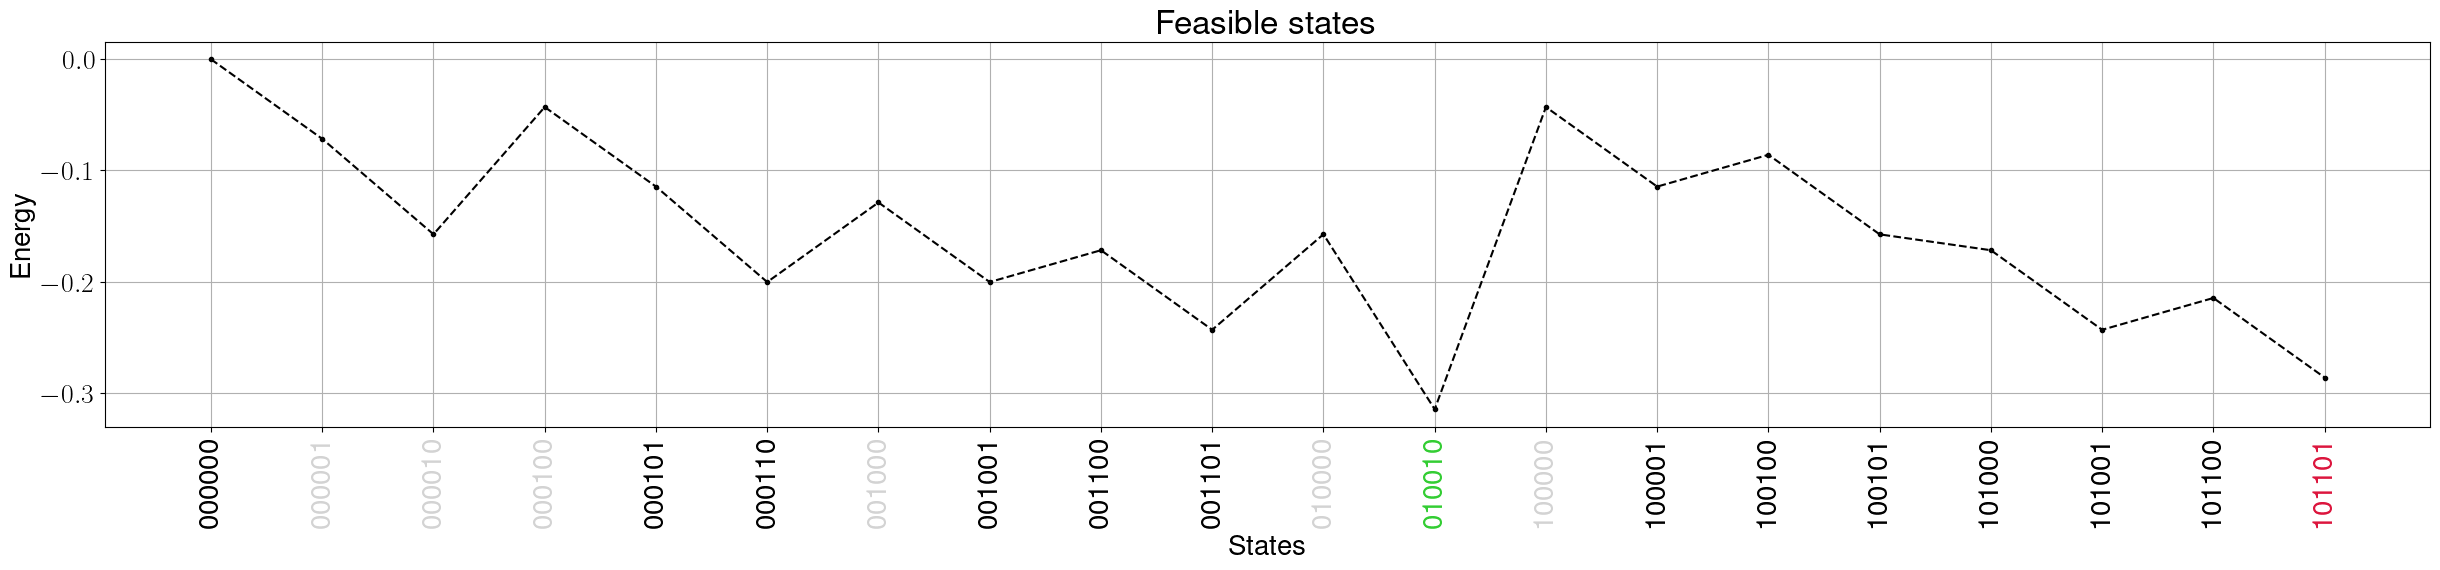

Initialization: ['000110', '101100', '001101', '101001', '101101', '010010', '000001', '000010', '000100', '001000', '010000', '100000']
kEC_11-10@17h21m_dim6_mail5_ultimi6conECall1_random_p3_5ra_k0.334_BOUNDS[0,2pi]x[-74,74]_pars0[0,2pi]x[-74,74]
Optimization terminated successfully.
         Current function value: 0.083461
         Iterations: 413
         Function evaluations: 655


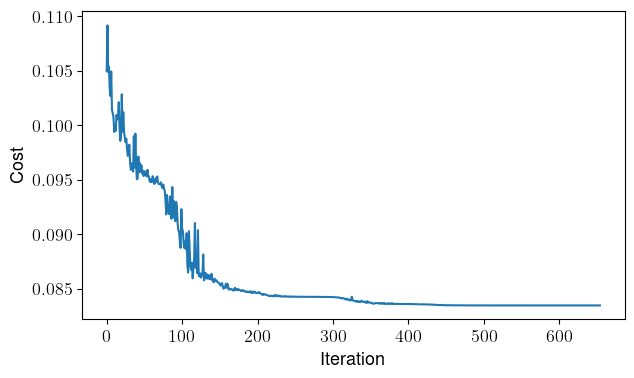

***UPDATING***


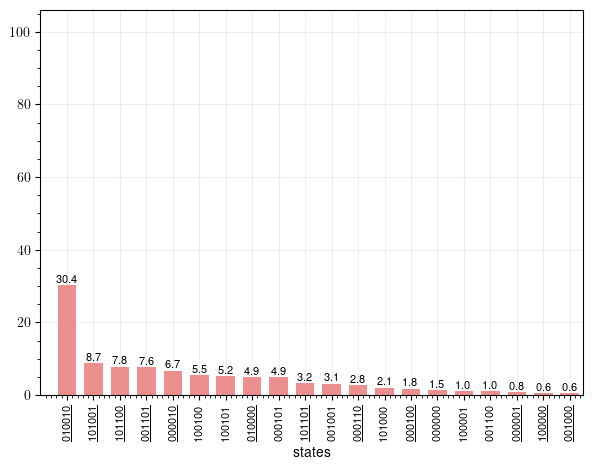

Optimization terminated successfully.
         Current function value: 0.095411
         Iterations: 603
         Function evaluations: 978


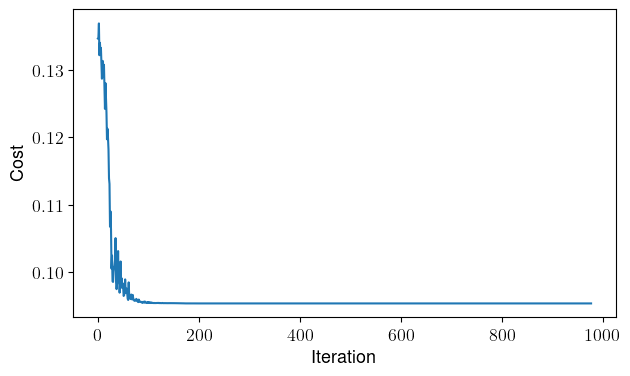

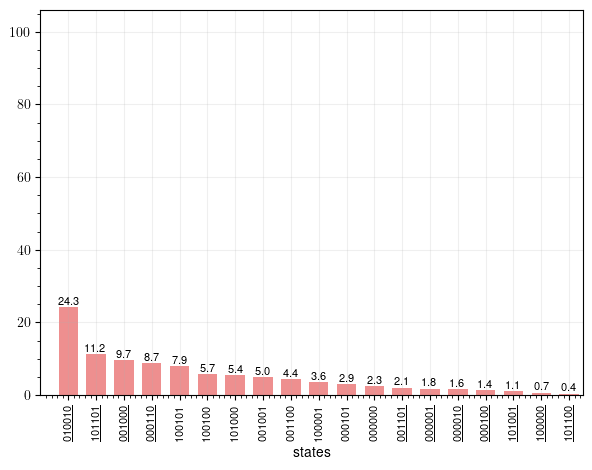

Optimization terminated successfully.
         Current function value: 0.080877
         Iterations: 670
         Function evaluations: 1042


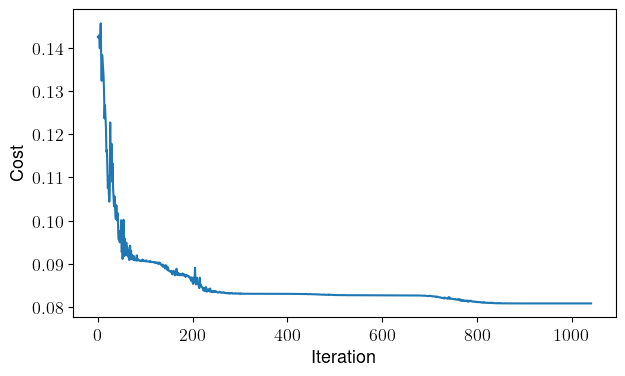

***UPDATING***


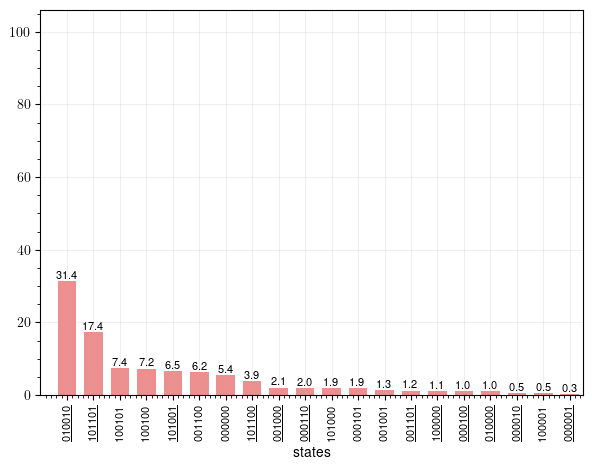

Optimization terminated successfully.
         Current function value: 0.064214
         Iterations: 577
         Function evaluations: 902


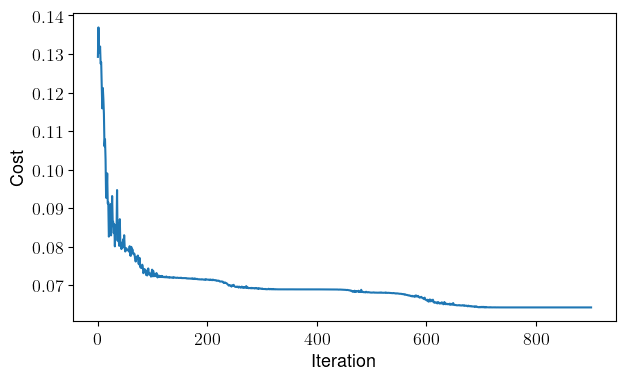

***UPDATING***


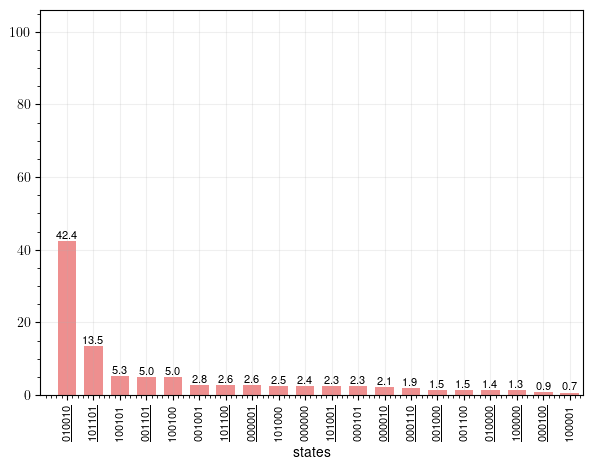

Optimization terminated successfully.
         Current function value: 0.094038
         Iterations: 365
         Function evaluations: 576


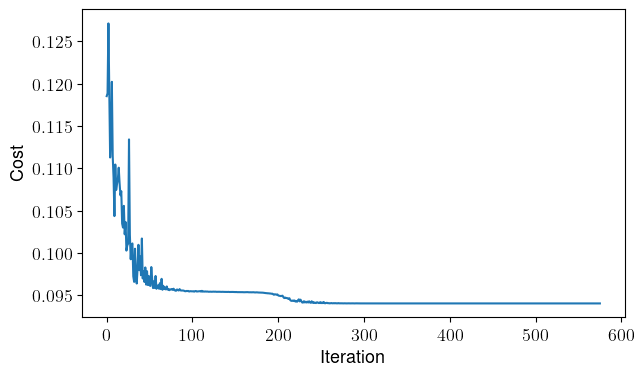

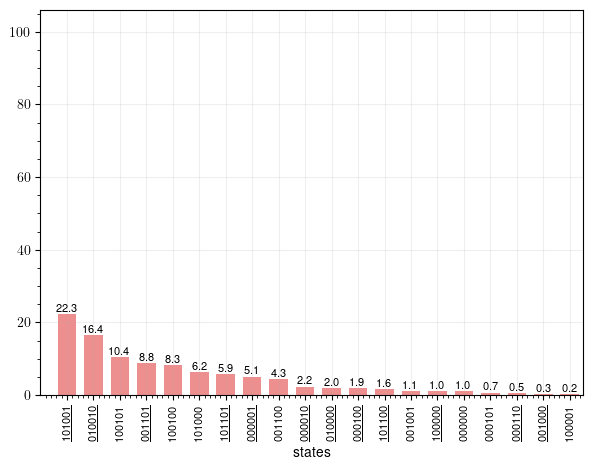

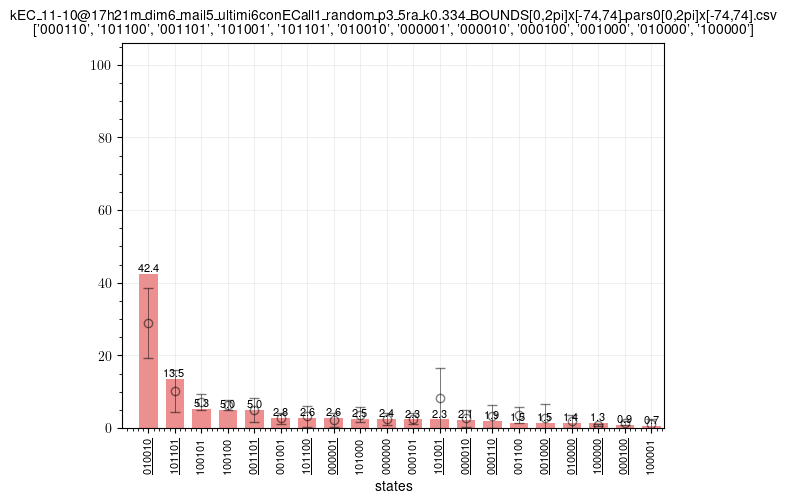


TOTAL ELAPSED TIME: 3.521046817302704 minutes.
6 0.251
init_name: ['000011', '010001', '100000', '011100', '010011', '100010', '000001', '000010', '000100', '001000', '010000', '100000']
EXACT_COVERS: ['010011', '011100', '100010']
MEC: ['100010']


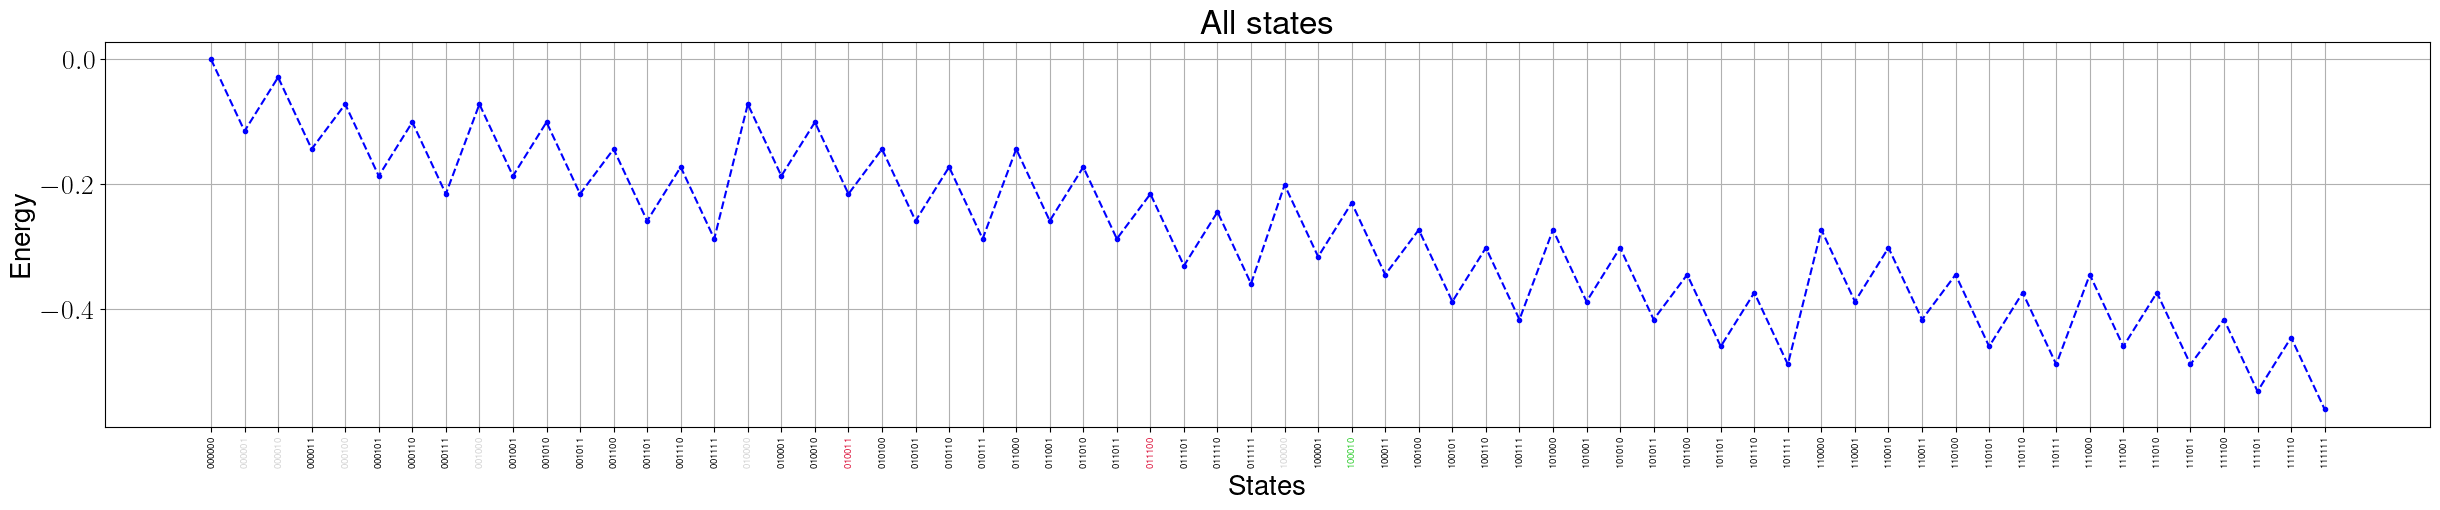

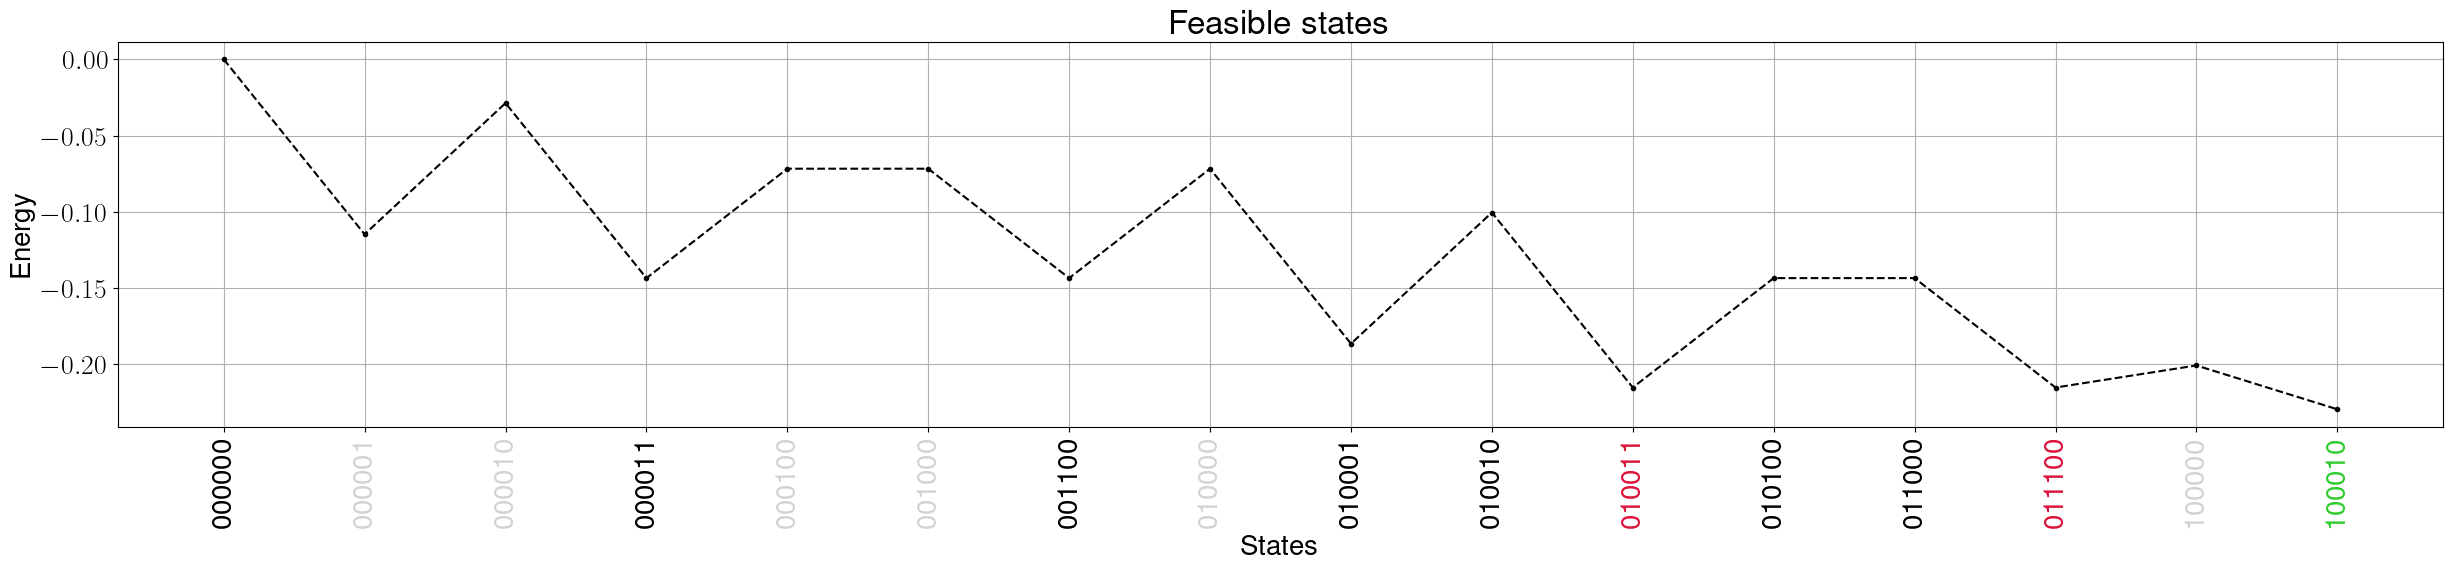

Initialization: ['000011', '010001', '100000', '011100', '010011', '100010', '000001', '000010', '000100', '001000', '010000', '100000']
kEC_11-10@17h24m_dim6_mail6_ultimi6conECall1_random_p3_5ra_k0.251_BOUNDS[0,2pi]x[-110,110]_pars0[0,2pi]x[-110,110]
Optimization terminated successfully.
         Current function value: 0.088893
         Iterations: 359
         Function evaluations: 555


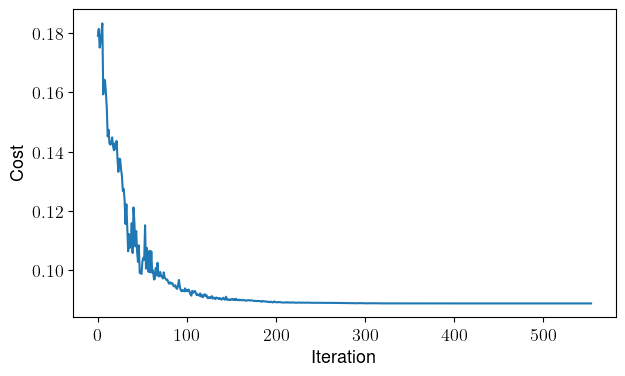

***UPDATING***


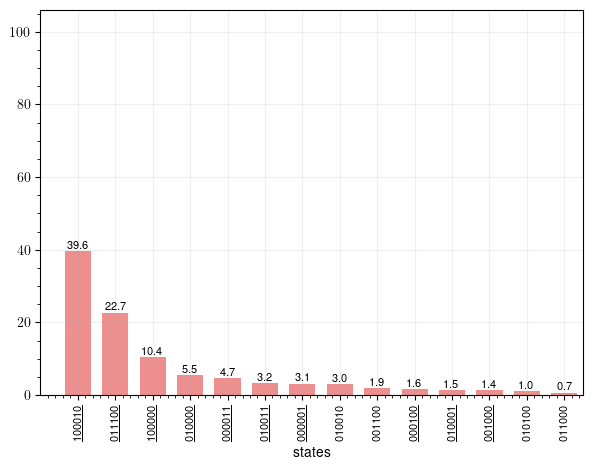

/tmp/ipykernel_303/1063111815.py:146: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  res = minimize(cost_func, pars_0, bounds=bnds,


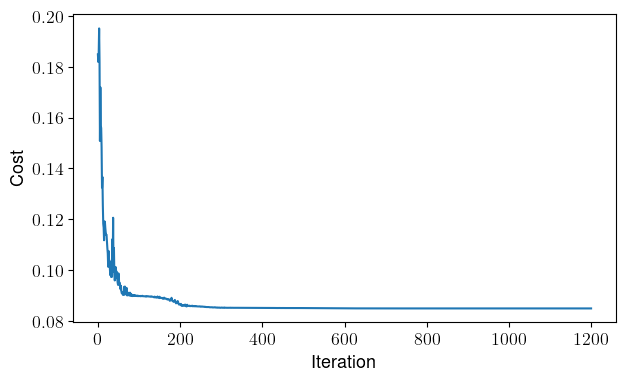

***UPDATING***


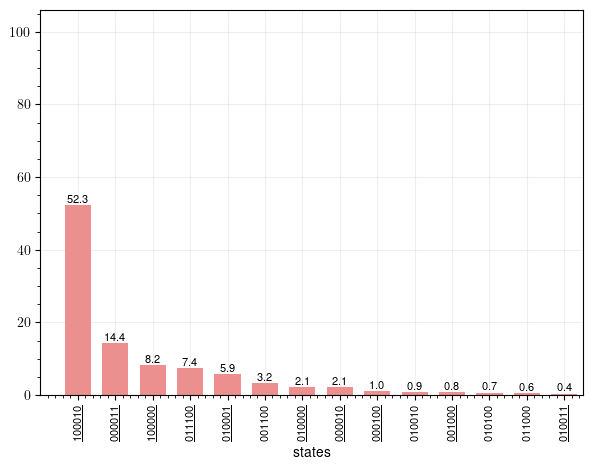

Optimization terminated successfully.
         Current function value: 0.090565
         Iterations: 530
         Function evaluations: 827


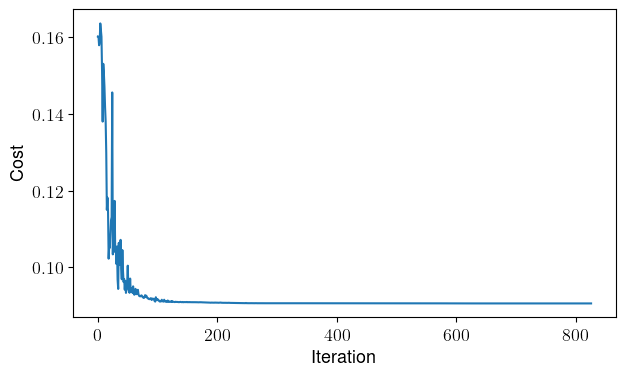

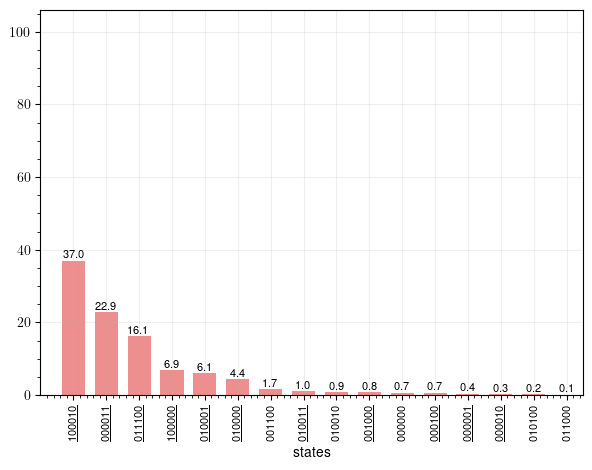

Optimization terminated successfully.
         Current function value: 0.078142
         Iterations: 378
         Function evaluations: 596


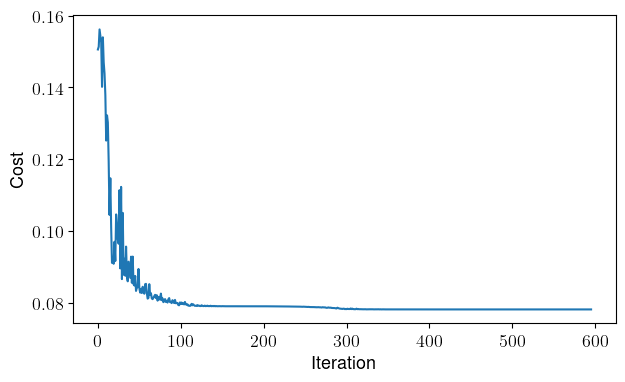

***UPDATING***


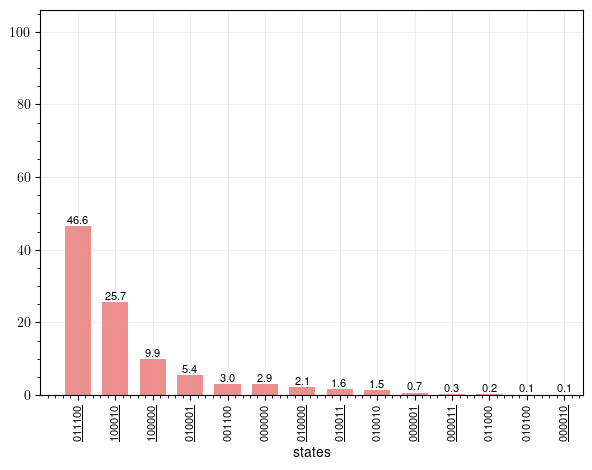

/tmp/ipykernel_303/1063111815.py:146: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  res = minimize(cost_func, pars_0, bounds=bnds,


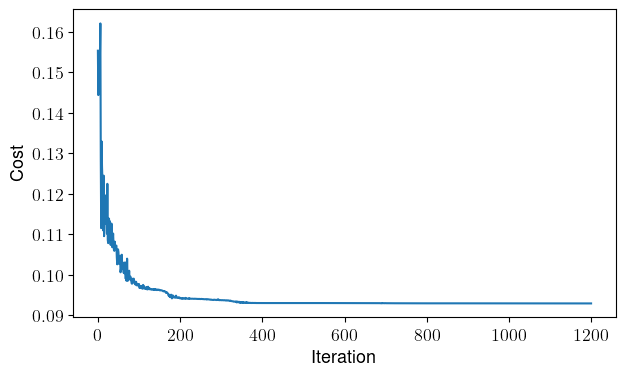

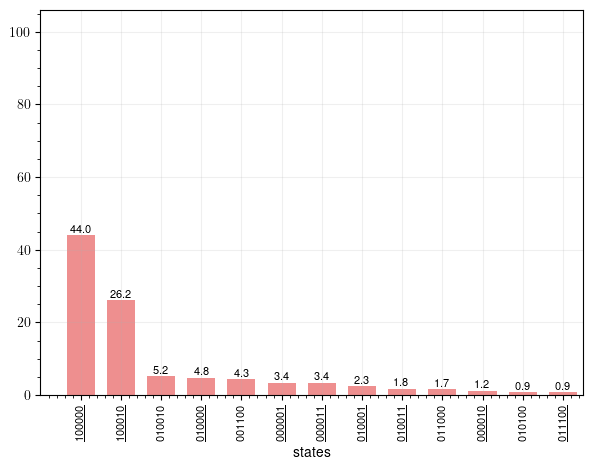

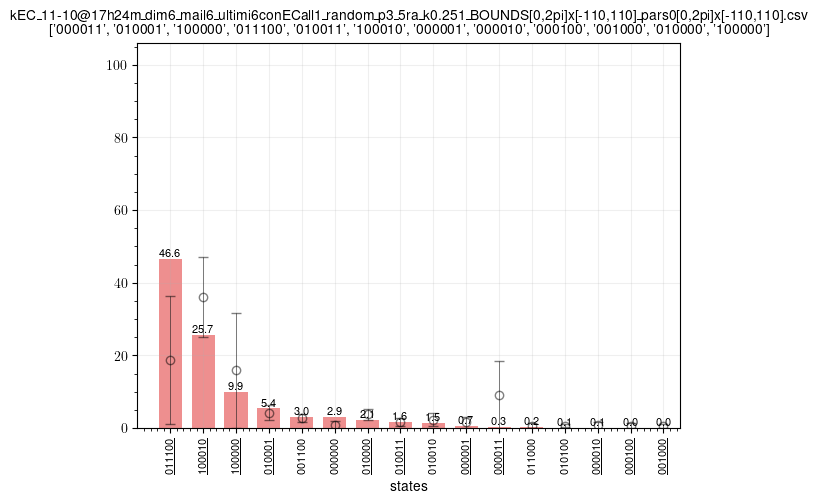


TOTAL ELAPSED TIME: 4.0732519586881 minutes.


In [31]:
# init_name = ['000100', '100000', '000000'] # type of initialization
p = 3 # number of layers
random_attempts = 5

for instance in [3,4,5,6]:
    h = h_L_ECs[instance-1][0]
    # h = h_L_MEC[instance-1]
    print(instance, h)

    
    ### These will contain the files' names.
    FILENAME_list = [] # list of .csv containing the final histograms data.
    DATA_FILENAME_list = [] # list of .txt containing extra data such as energies, betas, gammas.

    
    ### Define the instance.
    U, subsets_dict = define_instance(n, instance, verbose=False)
    subsets = list(subsets_dict.values())
    _, _, states_feasible, energies_feasible, EXACT_COVERS = find_spectrum(U, subsets_dict, n, h)
    MEC = [state for state in EXACT_COVERS if state.count("1") == min([x.count("1")  for x in EXACT_COVERS])]

    ################################################
    one_one_states = ["".join(elem) for elem in distinct_permutations('0'*(n-1) + '1')]
    
    # riordino in base a energia decrescente  
    s, e = zip(*sorted(zip(states_feasible,energies_feasible), key=lambda t: t[1], reverse=True))
    s = list(s)
    # elimino stati che sono EC o sono '000000'
    # s, e = [list(x) for x in zip(*filter(lambda t: t[0] not in EXACT_COVERS and t[0] != '0'*n, zip(s, e)))]
    # print(s,e )
    # init_name = s[:6] # i 6 più energetici
    init_name = s[-6:] + one_one_states # i 6 meno energetici

    # # ne prendo 10 a caso
    # sample_size = 10
    # print(s)
    # sorted_sample = [s[i] for i in sorted(random.sample(range(len(s)), sample_size))]
    # print(sorted_sample)
    # init_name = [state for state in sorted_sample if state != '0'*n][:6]
    

    # init_name = ["".join(elem) for elem in distinct_permutations('0'*(n-1) + '1')] + ['00000']


    
    # prendo a caso 3 feasible con due 1 + all1
    # one_one_states = ["".join(elem) for elem in distinct_permutations('0'*(n-1) + '1')]
    # two_one_states = [state for state in states_feasible if state.count("1") == 2 and not state in EXACT_COVERS]
    # if len(two_one_states) > 3:
    #     init_name = random.sample(two_one_states, 3) + one_one_states
    # else:
    #     init_name = two_one_states + one_one_states

    # init_name = init_names[instance] + one_one_states

    # init_name = [s for s in EXACT_COVERS if s.count("1") == max([s.count("1") for s in EXACT_COVERS])] 
    print("init_name:", init_name)
    ###############################################


    
    show_spectrum(n, instance, h)
    
    
    ### Prepare the cost and mixing circuit.
    constant, hamiltonian, qc_cost = build_cost_circuit(n, instance, h, verbose=False)
    qc_mixing = build_mixing_circuit(n, instance, verbose=False)
    qc_initial = build_initialization_circuit(n, instance, init_name, verbose=False)
    print(f"Initialization: {init_name}")
    
    ###########################################################
    ###########################################################
    ### SET INITIAL PARAMETERS FOR MINIMIZATION AND BOUNDS
    
    gamma_bound = find_gamma_bound(n, instance, h, verbose=False)
    
    beta_0 = (0, 2*np.pi)
    gamma_0 =  (-gamma_bound, gamma_bound)
    string_0 = f"[0,2pi]x[-{gamma_bound},{gamma_bound}]"
    
    bnds_beta = (0, 2*np.pi)
    bnds_gamma = (-gamma_bound, gamma_bound)
    bnds_string = f"[0,2pi]x[-{gamma_bound},{gamma_bound}]"
    
    ###########################################################
    ###########################################################
    ### BUILD FILES' NAMES
    
    # current_datetime = datetime.now().strftime("@%Y-%m-%d@%Hh%Mm%Ss")
    current_datetime = datetime.now().strftime("%d-%m@%Hh%Mm")
    
    header = f"kEC_{current_datetime}_dim{n}_mail{instance}_ultimi6conECall1_random_p{p}_{random_attempts}ra_k{h}"
    header = header + f"_BOUNDS{bnds_string}_pars0{string_0}"
    print(header)
    
    DATA_FILENAME = header + '_data.txt'
    FILENAME = header + ".csv"

    FILENAME_list.append(FILENAME)
    DATA_FILENAME_list.append(DATA_FILENAME)
    
    ###########################################################
    ###########################################################
    ### DO THE MINIMIZATION
    
    
    with open(DATA_FILENAME, 'a') as DATA_FILE:
        DATA_FILE.write(f"current datetime = {datetime.now().strftime('@%Y-%m-%d@%Hh%Mm%Ss')}")
        DATA_FILE.write(f"\np={p}\n")
        DATA_FILE.write(f"\ninit_name: {init_name}\n")
    
        E_best = 100
        counter = 0
        TOTAL_start_time = time.time()
    
    
        for i in range(1,random_attempts+1):
            print(f"----- {i}/{random_attempts} random_attempts -----", end="\r")
            DATA_FILE.write(f"\n----- {i}/{random_attempts} random_attempts -----\n")

            ### Build QAOAAnsatz.
            cost_vs_iteration = []
            ansatz = QAOAAnsatz(qc_cost, mixer_operator=qc_mixing, initial_state=qc_initial, reps=p, name='my_QAOA_circuit')


            ### Generate a pass manager without providing a backend.
            pm = generate_preset_pass_manager(optimization_level=3)
            ansatz_isa = pm.run(ansatz)
            hamiltonian_isa = hamiltonian.apply_layout(ansatz_isa.layout)
        
            estimator = StatevectorEstimator()
            sampler = StatevectorSampler()
        
            
            # *******************************  MINIMIZE  **********************************
            ### Do the minimization.
            pars_0 = [random.uniform(*beta_0) for _ in range(p)] + [random.uniform(*gamma_0) for _ in range(p)]  
            bnds = [bnds_beta]*p + [bnds_gamma]*p
            # print(f"pars_0 = {pars_0}")
            # print(f"bnds = {bnds}")
            
            # res = minimize(cost_func, pars_0,
            #                args=(ansatz_isa, hamiltonian_isa, estimator), 
            #                method="COBYLA", options={"maxiter":200, "tol":1e-3})
            # res = minimize(cost_func, pars_0, bounds=bnds,
            #                args=(ansatz_isa, hamiltonian_isa, estimator), 
            #                method="Nelder-Mead", options={"maxiter": 1200, "maxfev": 1200}, tol=1e-4)
            res = minimize(cost_func, pars_0, bounds=bnds,
                           args=(ansatz_isa, hamiltonian_isa, estimator), 
                           method="Nelder-Mead", options={"disp": True, "maxiter": 1200, "maxfev": 1200}, tol=1e-4)
            # The default value is method specific. For example for Nelder-Mead they are xatol=1e-4, fatol=1e-4
                        
            plt.figure(figsize=(7, 4))
            plt.rcParams['font.size'] = 13
            plt.plot(cost_vs_iteration)
            plt.xlabel("Iteration")
            plt.ylabel("Cost")
            plt.show()
            
            ### Select the optimal parameters (betas,gammas) found.
            betas = list(res.x[:p])
            gammas = list(res.x[p:])
            # print(f"Final parameters (after minimization): betas, gammas = {betas}, {gammas}")

            ### Minimum cost (energy) reached with minimization.
            E_min = res.fun + constant
            # E_min = res.fun -A -B  
            # print(f"E_min = res.fun - A - B = {E_min}")
            # print(f"E_min = res.fun + constant = {E_min}")
            
            DATA_FILE.write(f"\nE_min = {E_min}")
            DATA_FILE.write(f'\nE_min\'s parameters: betas = {betas}, gammas = {gammas}\n')

            ### Update the lowest energy solution index "i".
            if E_min < E_best:
                    E_best = E_min
                    i_best = i 
                    print("***UPDATING***")
        
                    
            # ****************************  RUN THE CIRCUIT  ******************************
            ### Assign to the ansatz the 2p parameters found, then run the circuit.
            pars = betas + gammas
            qc = ansatz.assign_parameters(pars)
            qc.measure_all()
            qc_isa = pm.run(qc)
            result = sampler.run([qc_isa], shots=1024).result()
            samp_dist = result[0].data.meas.get_counts()
       
            
            # ****************************  POST PROCESS  **********************************
            # Create a dataframe out of the sampling's results.
            df = pd.DataFrame(samp_dist.items()).rename(columns={0: 'states', 1: 'counts'})
            _, _, NUM_ANC, _ = get_circuit_parameters(subsets, verbose=False)
            df['states'] = df['states'].apply(lambda x: x[NUM_ANC:]) # remove ancillary bits
            df = df.groupby(['states']).sum()
            
            # Create a dictionary with states and occurrences.
            d = df['counts'].to_dict()
            lists = sorted(d.items(), key=lambda item: item[1], reverse=True)
        
            # Invert bit order ("01101 -> 10110")      
            d = invert_counts(d)
        
            
            # **************************** PLOT THE i-TH DATAFRAME ****************************
            # plt.figure(figsize=(15,5))
            # plt.rcParams['font.size'] = 13
            # plt.title(f"Ansatz with p={p}, {i} of {random_attempts}")
            # plt.ylim(0,1024)
            # plt.grid()
            df = pd.DataFrame(d.items())
            df = df.rename(columns={0: 'states', 1: f'counts_p{p}_{i}of{random_attempts}'})    
            df = df.sort_values(f'counts_p{p}_{i}of{random_attempts}', ascending=False) 
            plot_histogram_of_df_column(df, f'counts_p{p}_{i}of{random_attempts}', EXACT_COVERS, init_name, title='')
            # ax = sns.barplot(x='states', y=f'counts_p{p}_{i}of{random_attempts}', data=df)
            
            # # Make labels with percentages.
            # labels = df[f'counts_p{p}_{i}of{random_attempts}'].apply(lambda x: (x/df[f'counts_p{p}_{i}of{random_attempts}'].sum())*100).round(1).astype('str') + '%'
            # for container in ax.containers:
            #     ax.bar_label(container, labels=labels, fontsize=11)
                
            # # Highlight with red the exact covers
            # highlight_correct_ticks(ax, EXACT_COVERS)
            plt.show()
    
            # Merge dataframes.
            if i == 1:
                df_final = df
            else:
                df_final = pd.merge(df_final, df, on="states", how="outer")    
    
            if df['states'].iloc[0] == MEC:    
                DATA_FILE.write("\n### Most frequent state is MEC ###\n")
                counter += 1
        
        # ################### SAVE TO CSV AND FIX BETA,GAMMA ###################
        # Save to csv.
        df_final.to_csv(FILENAME, index=False)
        title = FILENAME +"\n"+ str(init_name)
        plot_histogram_of_best_column(df_final, f'counts_p{p}_{i_best}of{random_attempts}', EXACT_COVERS, init_name, title=title)
        ######################################################################
        DATA_FILE.write("\n*******************************")
        DATA_FILE.write(f"\nAttempt that reached the best result with E_min = {E_best} is #{i_best} ")
        DATA_FILE.write(f"\nMost frequent state was MEC / random attempts = {counter} / {random_attempts} = {round((counter/random_attempts)*100, 1)}%\n")
        
    
        print(f"\nTOTAL ELAPSED TIME: {(time.time() - TOTAL_start_time)/60} minutes.")
        DATA_FILE.write(f"\nTOTAL ELAPSED TIME: {(time.time() - TOTAL_start_time)/60} minutes.\n")

In [ ]:
t = FILENAME +"\n"+ str(init_name)
print(str(init_name))
plot_histogram_of_best_column(df_final, f'counts_p{p}_{i_best}of{random_attempts}', EXACT_COVERS, init_name, title=t)

### Read from files.

 Prendi i files elencando a mano degli headers:

In [41]:
# headers = ["27_09/27-09@17h40m_dim6_mail3_all0_random_p3_10ra_k0.5_BOUNDS[0,2pi]x[-44,44]_pars0[0,2pi]x[-44,44]",
#           "27_09/27-09@17h45m_dim6_mail3_all0_random_p3_10ra_k0.25_BOUNDS[0,2pi]x[-110,110]_pars0[0,2pi]x[-110,110]",
#           "27_09/27-09@17h49m_dim6_mail3_all0_random_p3_10ra_k0.167_BOUNDS[0,2pi]x[-220,220]_pars0[0,2pi]x[-220,220]"]
# header = "27-09@11h09m_dim6_mail3_all1_random_p3_10ra_k0.5_BkUNDS[0,2pi]x[-44,44]_pars0[0,2pi]x[-44,44]"

# DATA_FILENAME_list = []
# FILENAME_list = []
# for header in headers:
#     DATA_FILENAME = header + '_data.txt'
#     FILENAME = header + ".csv"
#     FILENAME_list.append(FILENAME)
#     DATA_FILENAME_list.append(DATA_FILENAME)
# 
# plot_list_of_files(FILENAME_list, DATA_FILENAME_list, title='k_{best}, inizializzazione all1')

Oppure prendi i file sapendo che contengono certe stringhe.

./kEC_11-10@17h12m_dim6_mail3_ultimi6conECall1_random_p3_5ra_k0.251_BOUNDS[0,2pi]x[-110,110]_pars0[0,2pi]x[-110,110].csv
./kEC_11-10@17h12m_dim6_mail3_ultimi6conECall1_random_p3_5ra_k0.251_BOUNDS[0,2pi]x[-110,110]_pars0[0,2pi]x[-110,110]_data.txt


./kEC_11-10@17h16m_dim6_mail4_ultimi6conECall1_random_p3_5ra_k0.167_BOUNDS[0,2pi]x[-110,110]_pars0[0,2pi]x[-110,110].csv
./kEC_11-10@17h16m_dim6_mail4_ultimi6conECall1_random_p3_5ra_k0.167_BOUNDS[0,2pi]x[-110,110]_pars0[0,2pi]x[-110,110]_data.txt


./kEC_11-10@17h21m_dim6_mail5_ultimi6conECall1_random_p3_5ra_k0.334_BOUNDS[0,2pi]x[-74,74]_pars0[0,2pi]x[-74,74].csv
./kEC_11-10@17h21m_dim6_mail5_ultimi6conECall1_random_p3_5ra_k0.334_BOUNDS[0,2pi]x[-74,74]_pars0[0,2pi]x[-74,74]_data.txt


./kEC_11-10@17h24m_dim6_mail6_ultimi6conECall1_random_p3_5ra_k0.251_BOUNDS[0,2pi]x[-110,110]_pars0[0,2pi]x[-110,110].csv
./kEC_11-10@17h24m_dim6_mail6_ultimi6conECall1_random_p3_5ra_k0.251_BOUNDS[0,2pi]x[-110,110]_pars0[0,2pi]x[-110,110]_data.txt


kEC_11-10@17

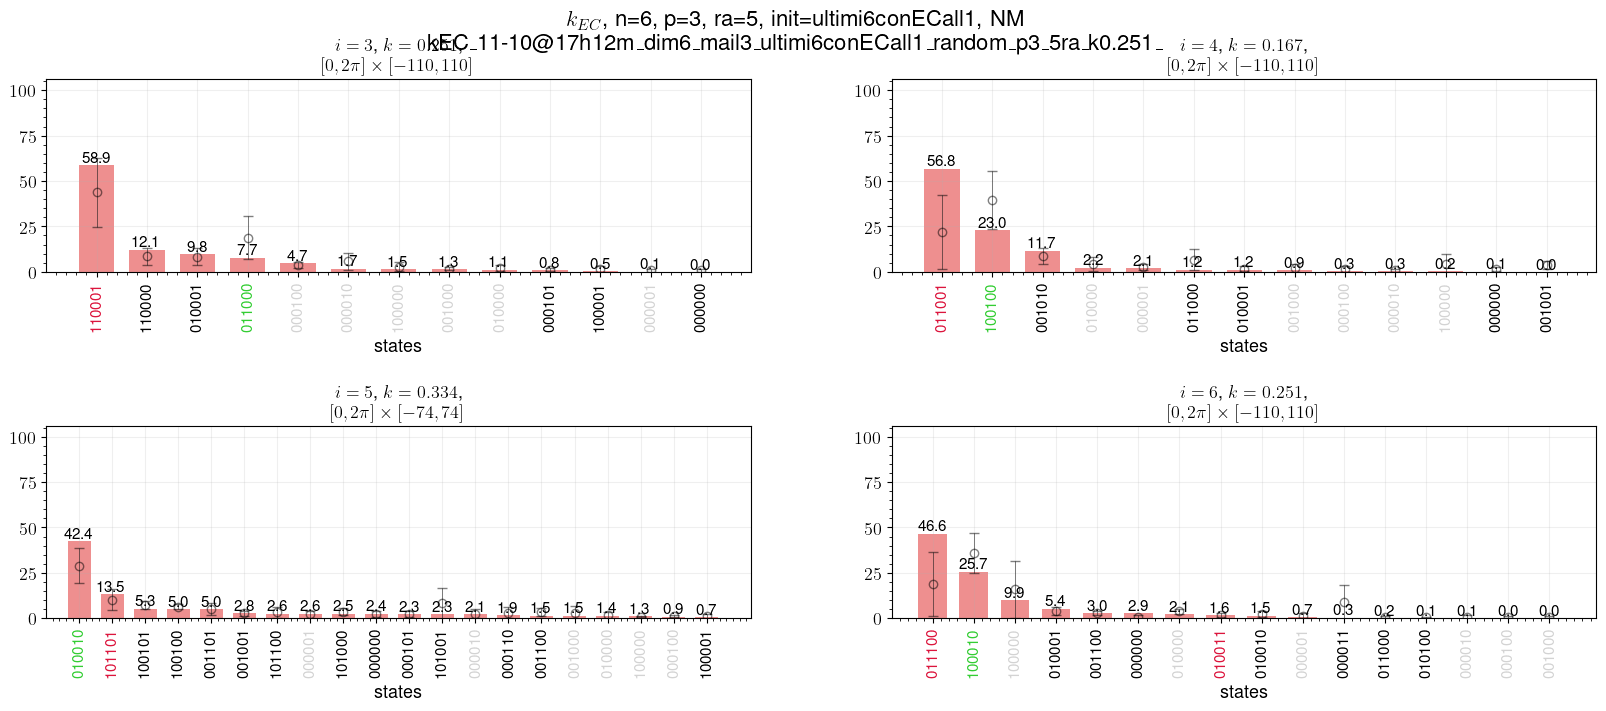

In [32]:
# FILENAME_list, DATA_FILENAME_list = find_files_containing_string(path='./da_1_ottobre/', 
                                                                   # strings=['dim6', 'mail6', 'all1', 'p3'], verbose=True)
FILENAME_list, DATA_FILENAME_list = find_files_containing_string(path='./', 
                                                                 strings=["ultimi6conECall1"], verbose=True)

# plot_list_of_files(FILENAME_list, DATA_FILENAME_list, title=r"$k=\frac{1}{n}\frac{L_{MEC}}{\min |S|}$, n=6, p=3, ra=10, init=all1",
#                    removefromtitles=["n", "p", "ra", "init"])

z = FILENAME_list[0].split("/")[1].split("BOUNDS")[0]
print(z)
plot_list_of_files(FILENAME_list, DATA_FILENAME_list, 
                   title=r"$k_{{EC}}$, n=6, p=3, ra=5, init=ultimi6conECall1, NM"+"\n"+z, 
                   removefromtitles=["n", "p", "ra", "init"])

## Barplot con diverse k
#### Confronta diverse k mettendo insieme più .csv

##### Prendi i files a mano

In [76]:
# headers = ["dim6_mail5_all1_random_p3_10ra_k0.167_BOUNDS[0,2pi]x[None,None]_pars0[0,2pi]x[-1000,1000]",
#            "dim6_mail5_all1_random_p3_10ra_k0.334_BOUNDS[0,2pi]x[None,None]_pars0[0,2pi]x[-1000,1000]",
#           "dim6_mail5_all1_random_p3_10ra_k0.5_BOUNDS[0,2pi]x[None,None]_pars0[0,2pi]x[-1000,1000]"]
#
#
# DATA_FILENAME_list = []
# FILENAME_list = []
# for header in headers:
#     DATA_FILENAME = header + '_data.txt'
#     FILENAME = header + ".csv"
#     FILENAME_list.append(FILENAME)
#     DATA_FILENAME_list.append(DATA_FILENAME)
#
#
# plot_list_of_files(FILENAME_list, DATA_FILENAME_list)

##### Oppue prendi tutti i file che hanno una stringa in comune

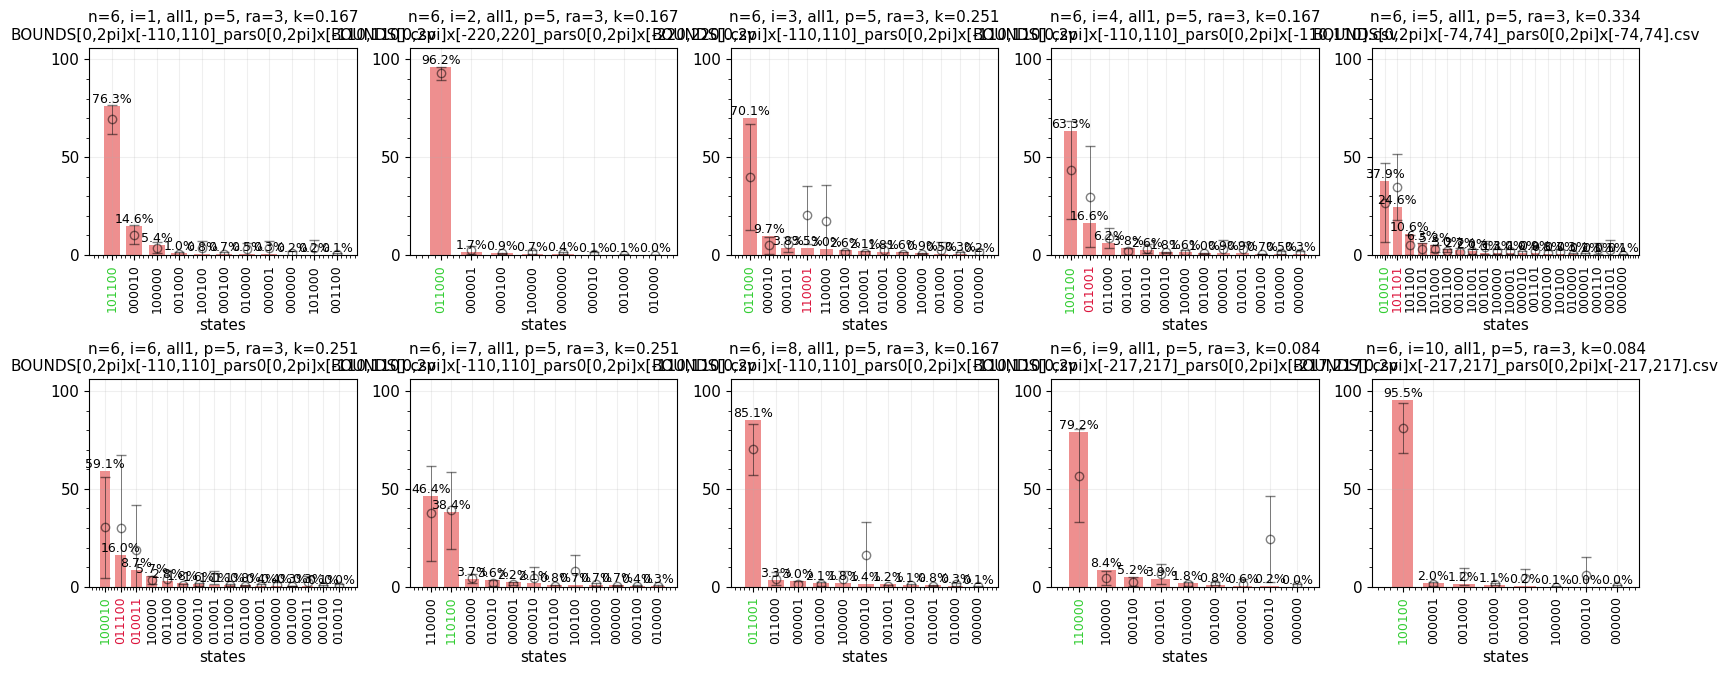

In [30]:
FILENAME_list, DATA_FILENAME_list = find_files_containing_string(path='da_1_ottobre/', 
                                                                 strings=[ 'p5'])

plot_list_of_files(FILENAME_list, DATA_FILENAME_list, title='')

##### Un unico barplot con diverse k.

6 6 all1 3 10 1.0
6 6 all1 1 10 0.251
6 6 all1 4 3 0.251
6 6 all1 5 3 0.251
6 6 all1 3 10 0.7505
6 6 all1 3 10 0.6255


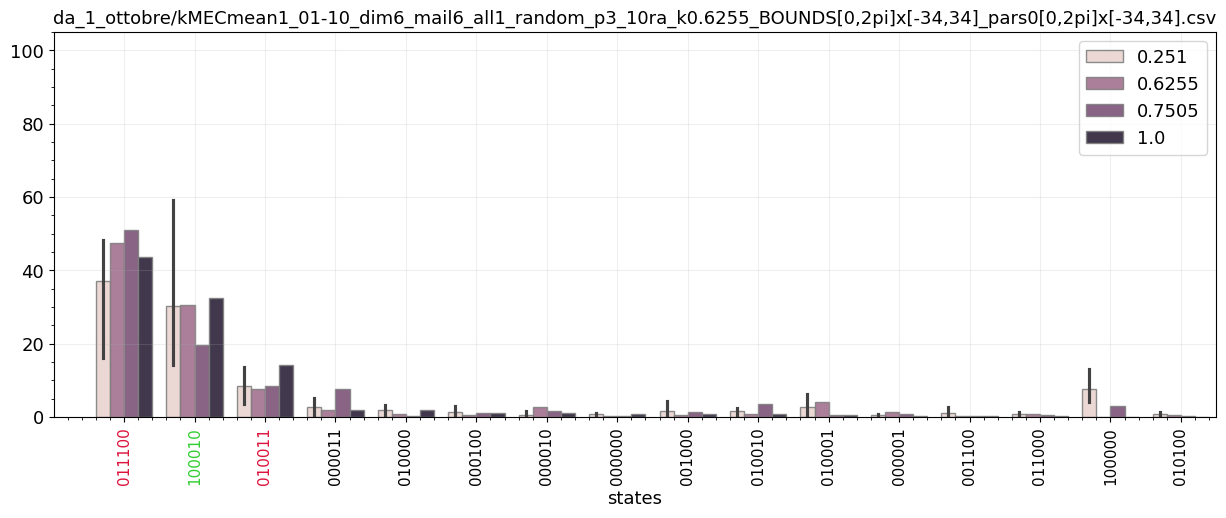

In [26]:
df_barplot = []
ks = []
num_files = len(FILENAME_list)
for FILENAME, DATA_FILENAME in zip(FILENAME_list, DATA_FILENAME_list):
    
    ##### EXTRAPOLATE INFORMATION FROM THE FILENAME
    n, instance, init_name, p, random_attempts, k = define_parameters_from_filename(DATA_FILENAME)
    print(n, instance, init_name, p, random_attempts, k)
    
    ##### WITH THIS INFORMATION, GET THE INSTANCE SETS
    U, subsets_dict = define_instance(n, instance, verbose=False)
    
    ##### FIND FEASIBLE STATES, ENERGIES, EXACT COVERS
    states, energies, states_feasible, energies_feasible, EXACT_COVERS = find_spectrum(U, subsets_dict, n, k)
    # print("\nEXACT_COVERS: ", EXACT_COVERS)
    
    ###########################################################
    ###########################################################
    
    ##### UPLOAD THE DATAFRAME FROM FILE
    df = pd.read_csv(FILENAME, dtype = str).set_index('states')
    df = df.astype(float).fillna(0.0)
    
    
    ##### COMPUTE PERCENTAGES AND ADD AVERAGE COLUMN
    total = df.sum()
    percentage = (df/ total) * 100
    
    percentage['average'] = percentage.mean(numeric_only=True, axis=1)
    percentage['std'] = percentage[percentage.columns[:-1]].std(numeric_only=True, axis=1)
    
    ##### FIND THE BEST HISTOGRAM INDEX (i_best) BASED ON THE MINIMUM ENERGY FOUND
    with open(DATA_FILENAME, 'r') as DATA_FILE:
        for line in DATA_FILE:
            if 'Attempt that reached the best result with' in line:                
                string = line.split('#')[1]
                i_best = string.split(' ')[0]
                # print("string", string)
                # print("i_best is", i_best)
                
    ##### THE COLUMN CORRESPONDING TO THE BEST RESULT
    column_best = f'counts_p{p}_{i_best}of{random_attempts}'
    
    
    ##### KEEP THE BEST AND THE AVERAGE RESULT
    percentage = percentage[[column_best, "average", "std"]]
    percentage = percentage.rename(columns={column_best: "y"})
    percentage["k"] = k
    percentage = percentage.sort_values("y", ascending=False)
    df_barplot.append(percentage)

    ks.append(k)

all_df = pd.concat(df_barplot)

##### FIGURE
N = 13
plt.figure(figsize=(15,5))
# clrs = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"][:len(FILENAME_list)]
# oppure palette =  sns.color_palette(clrs)
ax = sns.barplot(x="states", y="y", data=all_df, hue="k", width=0.8, alpha=0.9, palette=sns.cubehelix_palette(as_cmap=True)
)

# Fai il contorno
from matplotlib.patches import Rectangle
children = ax.get_children() # grab everything that is on the axis
for child in children:
    if isinstance(child, Rectangle): # filter for rectangles
        # clr = child.get_facecolor() # match edgecolors to facecolors
        clr = 'grey'
        child.set_edgecolor(clr)


# Stampa le percentuali.
percentage_text = 'off'
if percentage_text == 'on':
    # # Make labels with percentages.
    for i,container in enumerate(ax.containers):
        ### attenzione: sono al contrario! Ovvero
        ### df_barplot[0] corrisponde all'ultimo ax.container
        num = len(df_barplot) - 1
        labels = df_barplot[num-i%num_files]["y"].round(1).astype('str') + '%'
        ax.bar_label(container, labels=labels, fontsize=N-2)


# # Display errors.
# i = 0
# f = 0
# # for j,df in enumerate(df_barplot):
# for j in range(num_files):
#     df = pd.DataFrame({})
#     df["std"] = all_df.loc[all_df['k'] == ks[j], 'std']
#     print(j, "\n", df)
#     f += len(df)    
#     x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches[i:f]]
#     ### x_coords ha prima h'array delle coordinate delle barre che compaiono con il colore 1,
#     ### poi quello con le coordinate del colore 2, etc.
#     y_coords = [p.get_height() for p in ax.patches[i:f]]
#     ax.errorbar(x=x_coords, y=y_coords, yerr=df["std"], fmt=".", markerfacecolor='None', c="k", capsize=3.5, alpha=0.7)
#     i += len(df)



        
# Highlight exact covers' ticks with red.
highlight_correct_ticks(ax, EXACT_COVERS)



# Plot refinements.
plt.title(FILENAME, fontsize=N)
plt.xlabel("states", fontsize=N)
plt.ylabel("", fontsize=N)
plt.xticks(fontsize=N-2, rotation="vertical")
plt.yticks(fontsize=N)
plt.xlim(xmin=-1)
plt.ylim(ymin=0, ymax=105)
plt.minorticks_on()
plt.grid(alpha=0.2)
plt.legend(fontsize=N)

plt.show()
